Выполнил: Урбанович Иван Олегович

Мультивариативный ряд: история цен и объём торгов курса эфириума к доллару США.<br>
Данные охватывают период за c января 2020 года по март 2021 года.<br>
Решаем задачу регресии. Предсказываем цены.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'data/gemini_ETHUSD_2020_1min.csv'
data = pd.read_csv(file_path, index_col=False)
del data['Symbol']
del data['Unix Timestamp']
del data['Volume']

data = data.iloc[::-1].reset_index(drop=True)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index(data['Date'], inplace=True)

In [27]:
data

,Date,Open,High,Low,Close
Date,,,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,128.84,128.84,128.74,128.74
2020-01-01 00:01:00,2020-01-01 00:01:00,128.74,128.74,128.74,128.74
2020-01-01 00:02:00,2020-01-01 00:02:00,128.74,128.74,128.74,128.74
2020-01-01 00:03:00,2020-01-01 00:03:00,128.74,128.74,128.74,128.74
2020-01-01 00:04:00,2020-01-01 00:04:00,128.74,128.74,128.49,128.50
...,...,...,...,...,...
2021-04-19 23:59:00,2021-04-19 23:59:00,2166.54,2166.54,2162.36,2162.69
2021-04-20 00:00:00,2021-04-20 00:00:00,2162.69,2176.00,2162.69,2172.16
2021-04-20 00:01:00,2021-04-20 00:01:00,2172.16,2177.59,2168.63,2168.63


Данные были обрезаны до 50000 в силу экономии времени. Как бы не хотелось, но огромное количество данных сильно влияет на скорость обучения моделей (даже тест Дики-Фуллера выполнялся 10 минут)

In [28]:
data = data[:50000]

## Блок предобработки временного ряда
### Свойства временных рядов

Просмотр основной информации о мультивариационном ряде

In [29]:
data

,Date,Open,High,Low,Close
Date,,,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,128.84,128.84,128.74,128.74
2020-01-01 00:01:00,2020-01-01 00:01:00,128.74,128.74,128.74,128.74
2020-01-01 00:02:00,2020-01-01 00:02:00,128.74,128.74,128.74,128.74
2020-01-01 00:03:00,2020-01-01 00:03:00,128.74,128.74,128.74,128.74
2020-01-01 00:04:00,2020-01-01 00:04:00,128.74,128.74,128.49,128.50
...,...,...,...,...,...
2020-02-07 17:13:00,2020-02-07 17:13:00,221.39,221.40,221.24,221.24
2020-02-07 17:14:00,2020-02-07 17:14:00,221.24,221.26,221.24,221.26
2020-02-07 17:15:00,2020-02-07 17:15:00,221.26,221.48,221.26,221.48


In [30]:
data.describe()

,Date,Open,High,Low,Close
count,50000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2020-01-19 13:05:13.497600256,161.492210,161.536377,161.450697,161.494061
min,2020-01-01 00:00:00,125.600000,125.600000,125.600000,125.600000
25%,2020-01-10 16:18:45,143.130000,143.170000,143.090000,143.130000
50%,2020-01-19 08:38:30,164.480000,164.565000,164.410000,164.480000
75%,2020-01-29 00:57:15,175.330000,175.400000,175.310000,175.332500
max,2020-02-07 17:17:00,224.090000,224.290000,224.090000,224.090000
std,NaN,20.604069,20.614116,20.593835,20.604848


Графики временных рядов

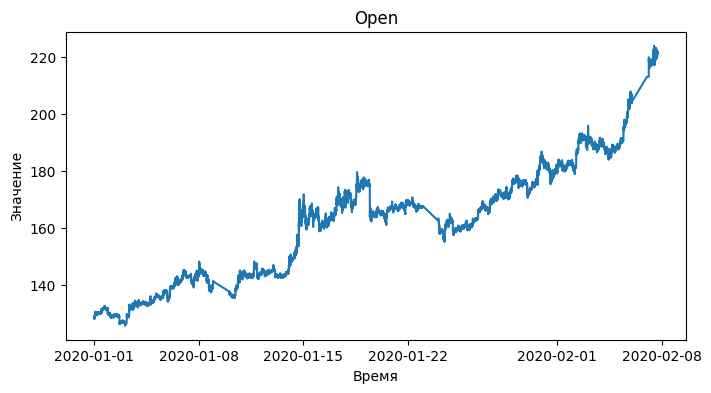

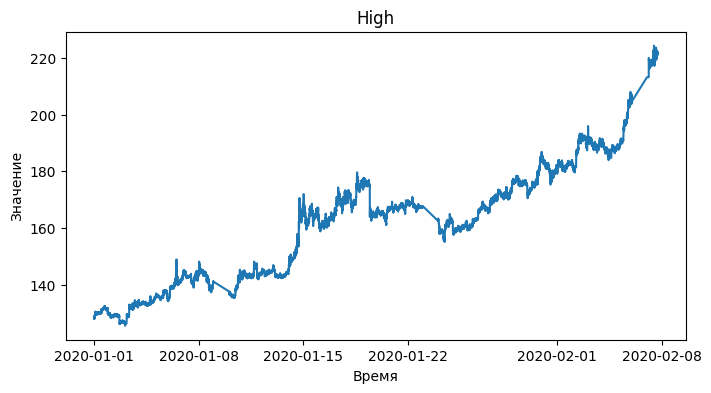

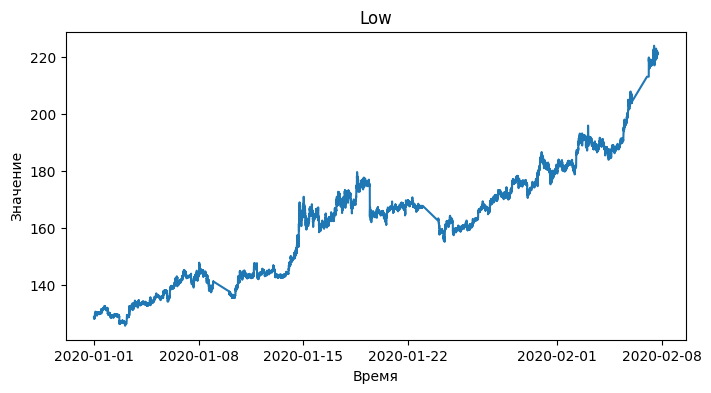

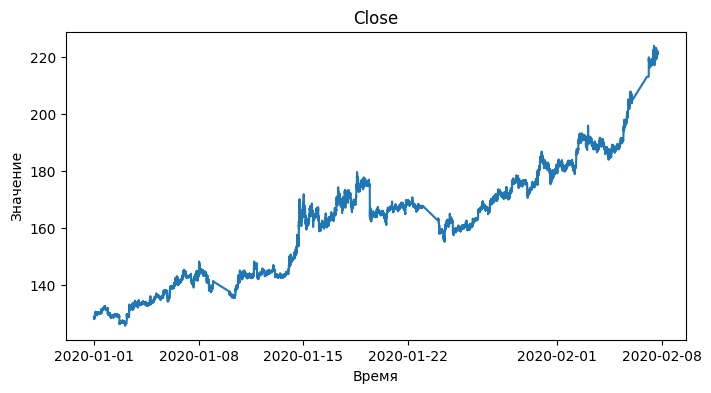

In [31]:
columns = data.columns

for column in columns:
    if column != 'Date':
        plt.figure(figsize=(8, 4))
        plt.plot(data[column])
        plt.title(column)
        plt.xlabel('Время')
        plt.ylabel('Значение')
        plt.show()

Проверка на то, что все данные передаются через равный промежуток времени. Данные в датасете передаются через одну минуту.

In [32]:
time_diff = data['Date'].diff()

result = (time_diff == pd.Timedelta(minutes=1)).all()
result

False

Просмотр пропущенных значений во временном ряде

In [33]:
missing_values = data.isnull().sum()
missing_values

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Посмотрим на составляющие временного ряда.

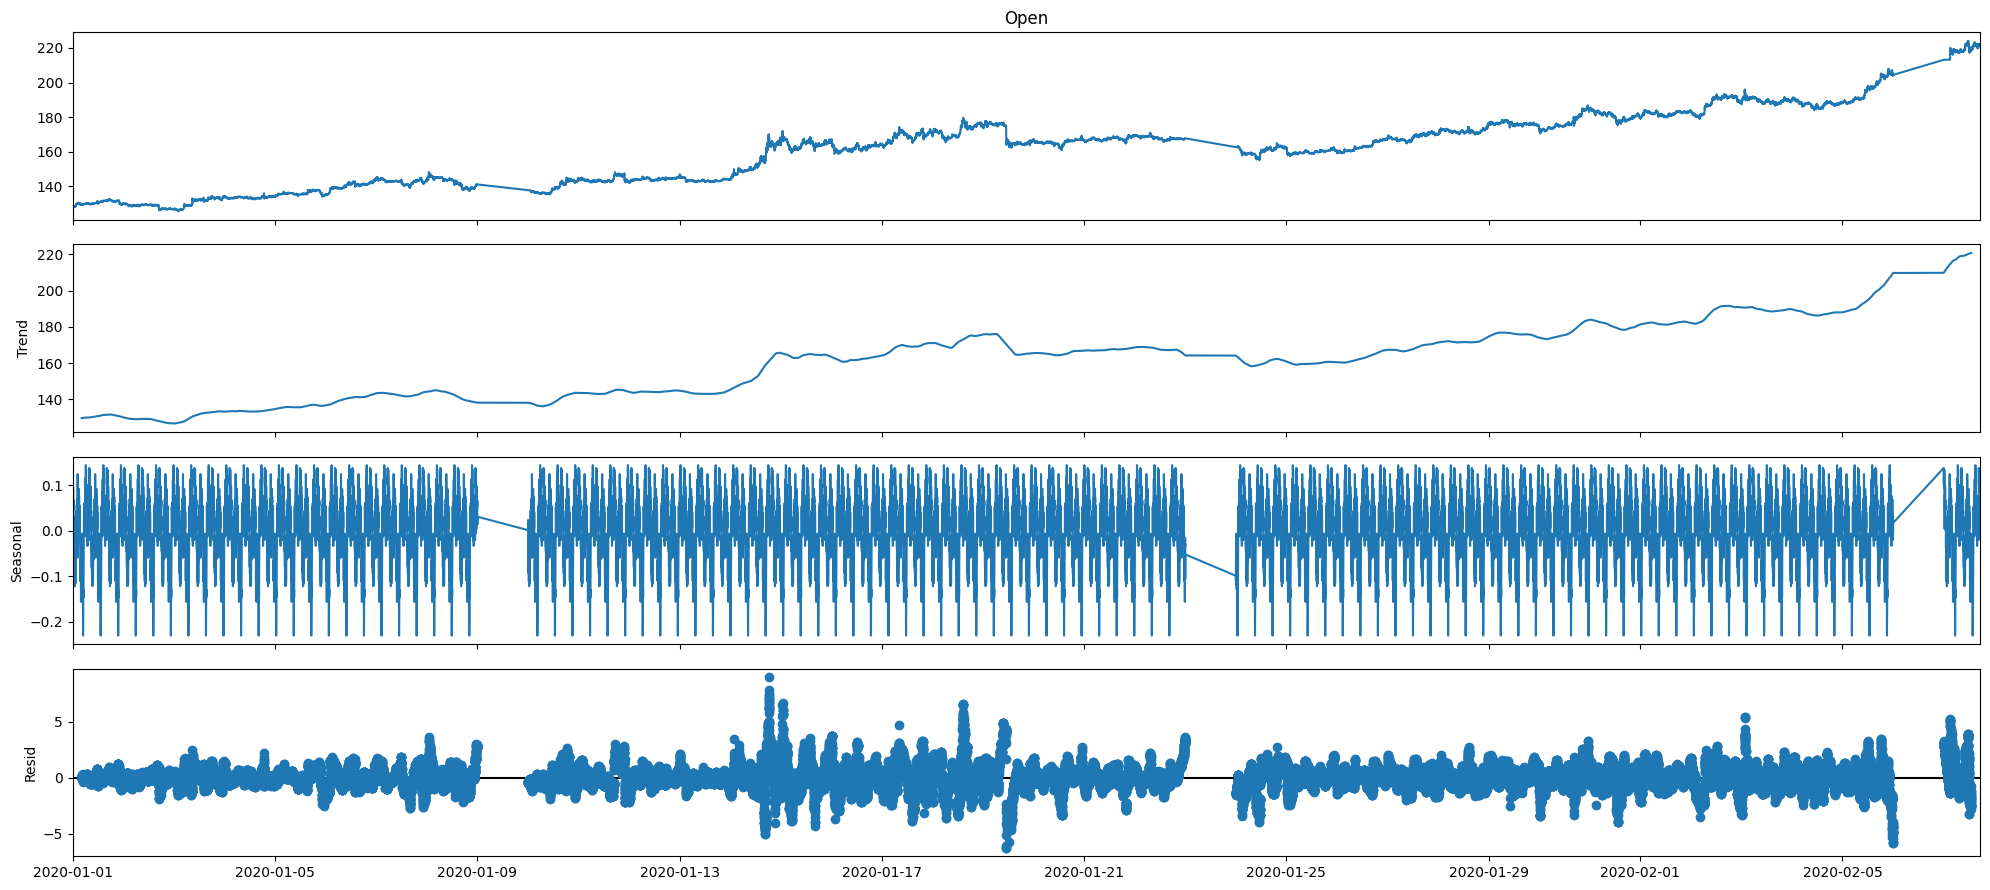

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 20, 9

decompose = seasonal_decompose(data['Open'], period=500)
decompose.plot()
plt.show()

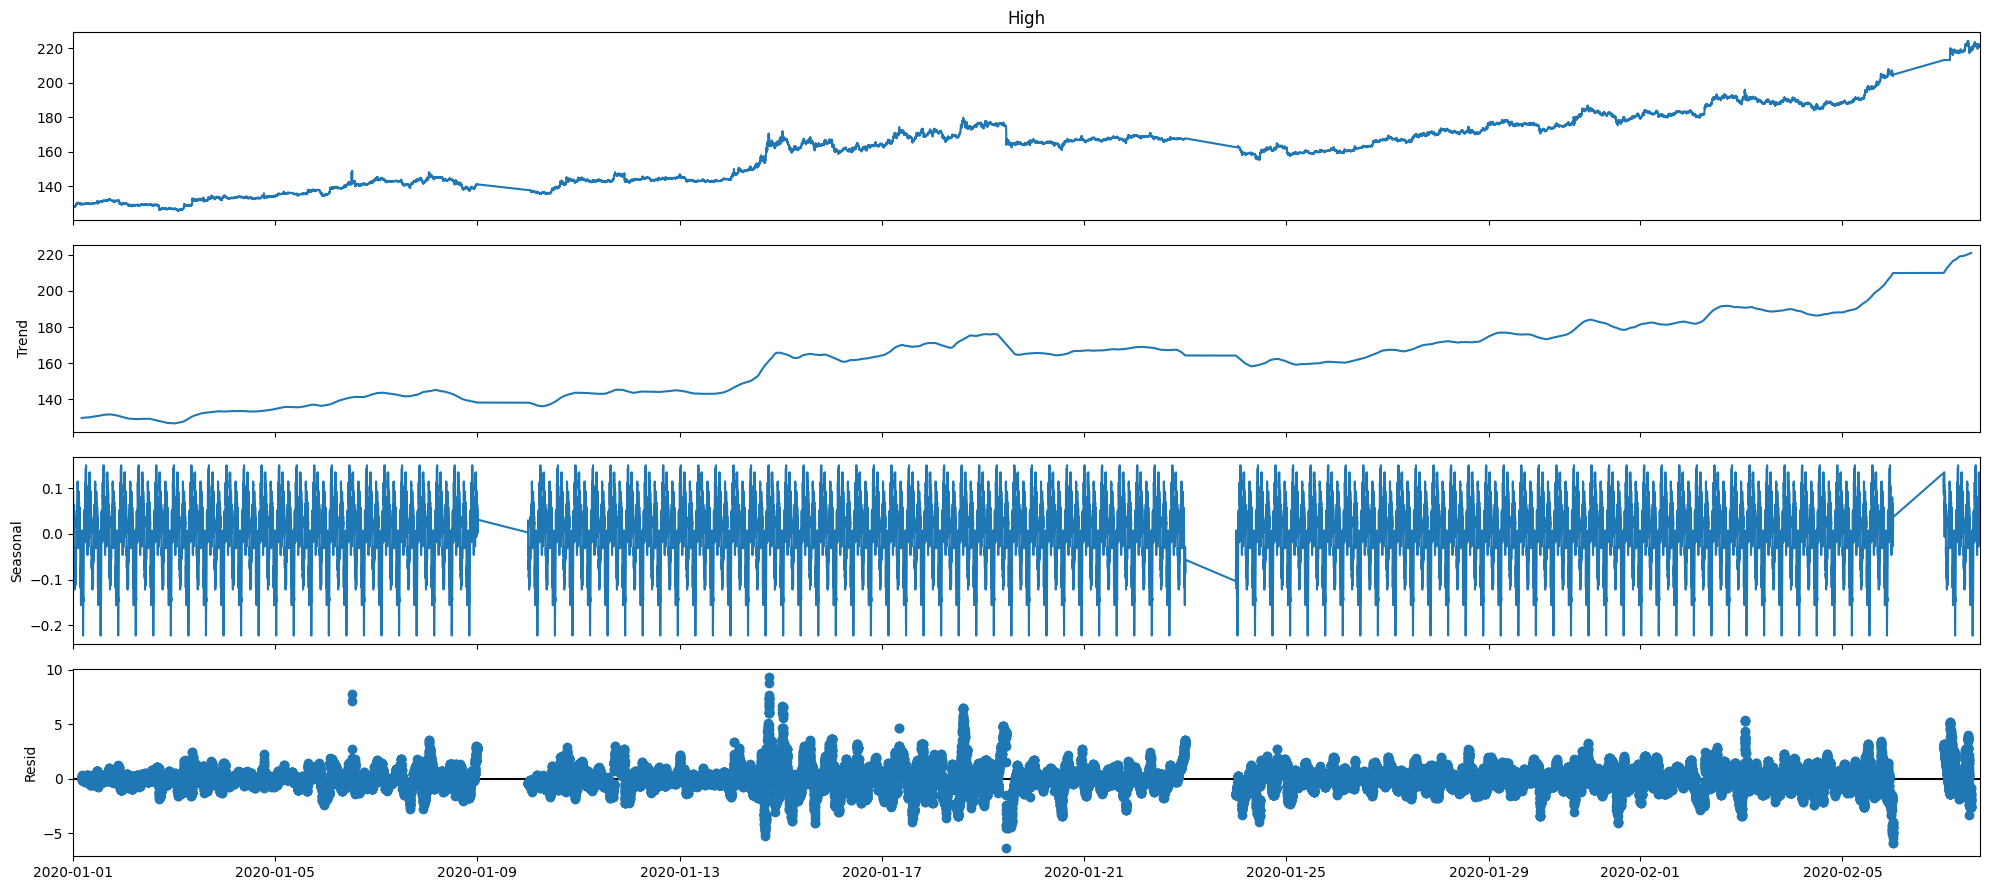

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 20, 9

decompose = seasonal_decompose(data['High'], period=500)
decompose.plot()
plt.show()

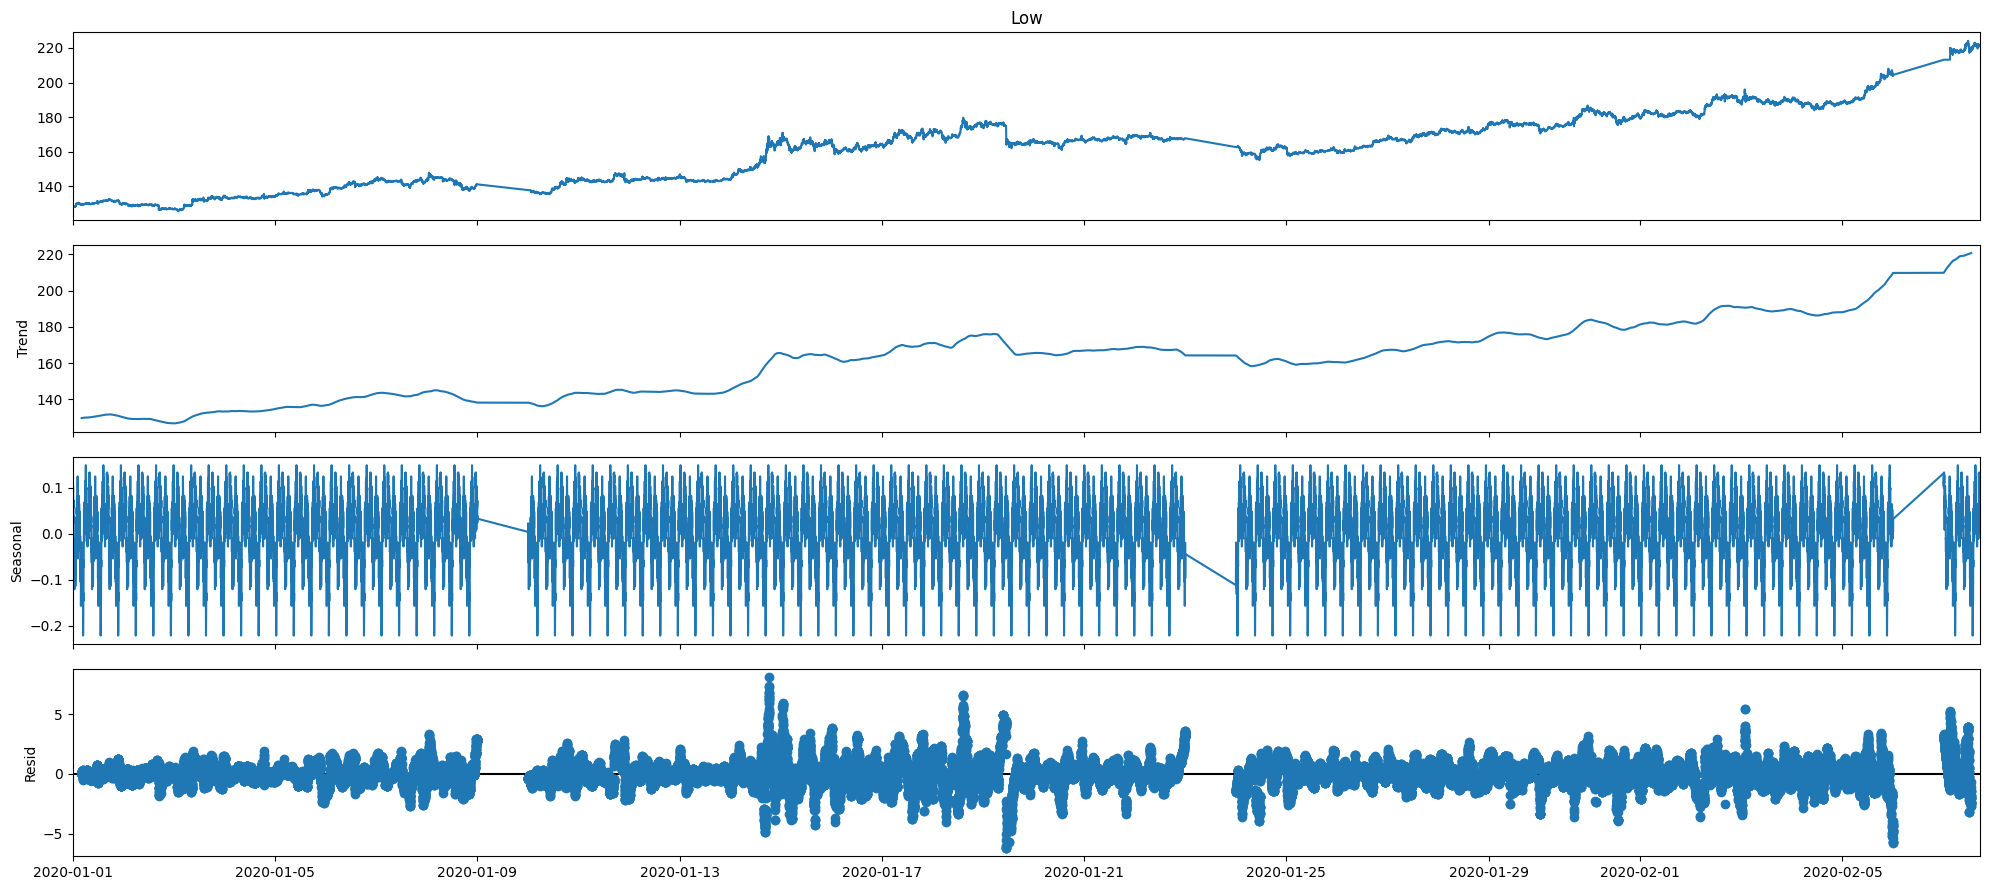

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 20, 9

decompose = seasonal_decompose(data['Low'], period=500)
decompose.plot()
plt.show()

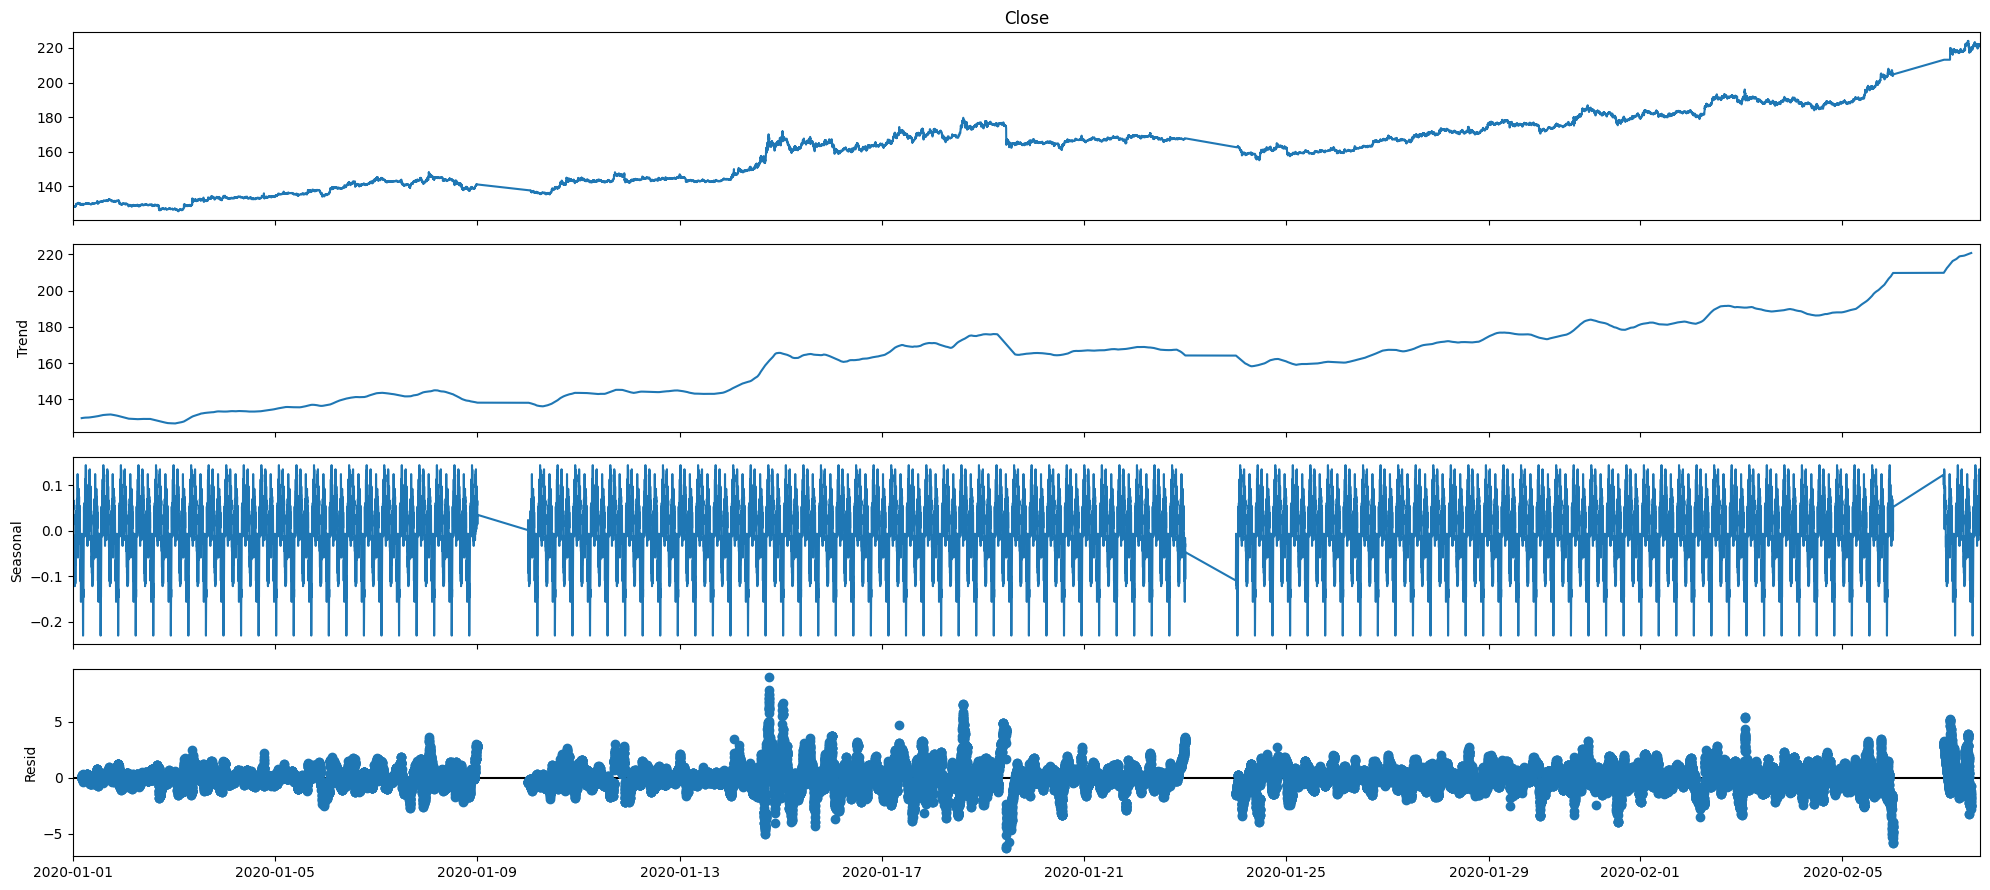

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 20, 9

decompose = seasonal_decompose(data['Close'], period=500)
decompose.plot()
plt.show()

Из графиков видно, что тренд отсутствуют, наблюдается сезонность.<br>

Проверка рядов на стационарность

In [43]:
from statsmodels.tsa.stattools import adfuller

def df_test(name: str, df: pd.Series) -> None:
    alpha = 0.05
    name = name
    ts = df
    print(f"Тест Дики-Фуллера ряда {name}:")
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Users', 'Number of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if dfoutput["p-value"] < alpha:
        print(f"Значение p меньше {alpha*100}%. Ряд стационарный.")
    else:
        print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

In [44]:
df_test("Open", data["Open"])

Тест Дики-Фуллера ряда Open:
Test Statistic                     0.891335
p-value                            0.992976
#Lags Users                       43.000000
Number of Observations Used    49956.000000
Critical Value (1%)               -3.430481
Critical Value (5%)               -2.861598
Critical Value (10%)              -2.566801
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


In [45]:
df_test("High", data["High"])

Тест Дики-Фуллера ряда High:
Test Statistic                     0.800128
p-value                            0.991638
#Lags Users                       27.000000
Number of Observations Used    49972.000000
Critical Value (1%)               -3.430481
Critical Value (5%)               -2.861598
Critical Value (10%)              -2.566801
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


In [46]:
df_test("Low", data["Low"])

Тест Дики-Фуллера ряда Low:
Test Statistic                     0.918553
p-value                            0.993328
#Lags Users                       47.000000
Number of Observations Used    49952.000000
Critical Value (1%)               -3.430481
Critical Value (5%)               -2.861598
Critical Value (10%)              -2.566801
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


In [47]:
df_test("Close", data["Close"])

Тест Дики-Фуллера ряда Close:
Test Statistic                     0.889766
p-value                            0.992955
#Lags Users                       43.000000
Number of Observations Used    49956.000000
Critical Value (1%)               -3.430481
Critical Value (5%)               -2.861598
Critical Value (10%)              -2.566801
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


Для прогнозирования в моделях VAR, VARMA важна стационарность.<br>
Для нейронок это уже необязательно.

Попробуем сезонное дифференцирование, чтобы сделать ряды стационарными.<br>

In [48]:
del data['Date']
lags = 15
differenced_series = data.diff(periods=lags).dropna()

Проверим

In [49]:
df_test("Open", differenced_series["Open"])

Тест Дики-Фуллера ряда Open:
Test Statistic                   -28.836026
p-value                            0.000000
#Lags Users                       55.000000
Number of Observations Used    49929.000000
Critical Value (1%)               -3.430481
Critical Value (5%)               -2.861598
Critical Value (10%)              -2.566801
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


In [50]:
df_test("High", differenced_series["High"])

Тест Дики-Фуллера ряда High:
Test Statistic                   -28.976748
p-value                            0.000000
#Lags Users                       55.000000
Number of Observations Used    49929.000000
Critical Value (1%)               -3.430481
Critical Value (5%)               -2.861598
Critical Value (10%)              -2.566801
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


In [51]:
df_test("Low", differenced_series["Low"])

Тест Дики-Фуллера ряда Low:
Test Statistic                   -28.870590
p-value                            0.000000
#Lags Users                       57.000000
Number of Observations Used    49927.000000
Critical Value (1%)               -3.430481
Critical Value (5%)               -2.861598
Critical Value (10%)              -2.566801
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


In [52]:
df_test("Close", differenced_series["Close"])

Тест Дики-Фуллера ряда Close:
Test Statistic                   -28.871539
p-value                            0.000000
#Lags Users                       55.000000
Number of Observations Used    49929.000000
Critical Value (1%)               -3.430481
Critical Value (5%)               -2.861598
Critical Value (10%)              -2.566801
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


### Коинтеграция

Коинтеграция временных рядов – причинно-следственная зависимость в уровнях двух и более временных рядов, которая выражается в совпадении или противоположной направленности тенденций данных рядов и случайной колеблемости.

Если временные ряды коинтегрированы, это обычно означает, что можно строить модели, учитывающие их долгосрочные взаимосвязи для лучших предсказаний (VAR, VARMA и т.д.).

In [53]:
from itertools import combinations
from statsmodels.tsa.stattools import coint

pairs = combinations(differenced_series.columns, 2)

for pair in pairs:
    pair_data = differenced_series[list(pair)]
    score, pvalue, _ = coint(pair_data[pair[0]], pair_data[pair[1]])
    
    if pvalue < 0.05:
        print(f"Есть коинтеграция между {pair[0]} и {pair[1]}")
    else:
        print(f"Отсутствует коинтеграция между {pair[0]} и {pair[1]}")

Есть коинтеграция между Open и High
Есть коинтеграция между Open и Low
Есть коинтеграция между Open и Close
Есть коинтеграция между High и Low
Есть коинтеграция между High и Close
Есть коинтеграция между Low и Close


Причинность рядов по Грейнджеру

In [55]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import warnings
from tqdm import tqdm

maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in tqdm(df.columns):
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value  
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
warnings.filterwarnings("ignore")
j_test = grangers_causation_matrix(differenced_series, variables = data.columns)
warnings.filterwarnings("default")
j_test

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:14<00:00,  3.55s/it]


,Open_x,High_x,Low_x,Close_x
Open_y,1.0,0.0,0.0,0.0
High_y,0.0,1.0,0.0,0.0
Low_y,0.0,0.0,1.0,0.0
Close_y,0.0,0.0,0.0,1.0


Если результат теста Грейнджера показывает строгое значение p-уровня значимости равное нулю или близкое к нулю (< 0.05) для пары временных рядов, это обычно интерпретируется как сильное статистическое доказательство в пользу наличия причинной связи между этими рядами. Ну и как итог - VAR модели подходят идеально.

#### Прогнозирование временного ряда

Первая модель - VAR. Для начала - подберем наилучший порядок, исходя из информационных критериев:<br>

AIC (Akaike Information Criterion)<br>
BIC (Bayesian Information Criterion)<br>
FPE (Final Prediction Error)<br>
HQC (Hannan-Quinn Criterion).<br> 

Меньшие значения критериев указывают на лучшую модель, и их можно использовать для выбора оптимального порядка модели VAR.

In [56]:
from statsmodels.tsa.vector_ar.var_model import VAR
import numpy as np

train, test = differenced_series[:35000], differenced_series[35000:]

model = VAR(train)

orders = [2,6,12,20,24,30,40,48,50,96,168,252,336]
AIC_min = 1
BIC_min = 1
FPE_min = 1
HQC_min = 1

results = [[],[],[],[]]
for i in orders:
    result = model.fit(i)
    results[0].append(result.aic)
    results[1].append(result.bic)
    results[2].append(result.fpe)
    results[3].append(result.hqic)

best_pos = [np.argmin(results[0]),np.argmin(results[1]),np.argmin(results[2]),np.argmin(results[3])]

for i,j in enumerate(zip(*results)):
    print('Lag Order =', orders[i])
    print('AIC : ', j[0], "*" if i == best_pos[0] else "")
    print('BIC : ', j[1], "*" if i == best_pos[1] else "")
    print('FPE : ', j[2], "*" if i == best_pos[2] else "")
    print('HQIC: ', j[3], "*" if i == best_pos[3] else "", '\n')

c:\Users\urban\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Lag Order = 2
AIC :  -18.011291122407727 
BIC :  -18.002585777443574 
FPE :  1.5058983367032757e-08 
HQIC:  -18.008518244699037  

Lag Order = 6
AIC :  -18.02707096200285 
BIC :  -18.002887010762052 
FPE :  1.4823220084409204e-08 
HQIC:  -18.019367705927746  

Lag Order = 12
AIC :  -18.046224437810412 
BIC :  -17.99881672536015 
FPE :  1.4542005703853511e-08 
HQIC:  -18.031123650338074  

Lag Order = 20
AIC :  -19.010137473442693 
BIC :  -18.93175381745248 
FPE :  5.546285345827222e-09 
HQIC:  -18.985169643117686  

Lag Order = 24
AIC :  -19.013274451804758 
BIC :  -18.919398138112545 
FPE :  5.528914161105403e-09 
HQIC:  -18.983371527425582  

Lag Order = 30
AIC :  -19.329623385660565 
BIC :  -19.212502225187368 
FPE :  4.0295010596481496e-09 
HQIC:  -19.29231585344581  

Lag Order = 40
AIC :  -19.452864782068186 
BIC :  -19.296986574677696 
FPE :  3.562281873881779e-09 
HQIC:  -19.403210989241014  

Lag Order = 48
AIC :  -19.688135431117956 
BIC :  -19.501237505124383 
FPE :  2.81547

Обучаем модель с наилучшим порядком (336)

In [57]:
model_fitted = model.fit(336)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Jan, 2024
Time:                     00:00:00
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -18.9036
Nobs:                     34664.0    HQIC:                  -19.7975
Log likelihood:           159013.    FPE:                1.66160e-09
AIC:                     -20.2156    Det(Omega_mle):     1.42691e-09
--------------------------------------------------------------------
Results for equation Open
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.000083         0.000186            0.447           0.655
L1.Open            0.000176         0.006220            0.028           0.977
L1.High            0.000121         0.002868            0.042           0

Теперь подготовим тестовые данные для предсказания, и сделаем их

In [63]:
def create_test_dataset(test, in_seq_order, for_len=1, step=1):
    X_test = []
    Y_test = []
    for i in range(0, len(test) - for_len - in_seq_order, step):
        X_test.append(test[i:(i+in_seq_order)].to_numpy())
        Y_test.append(test[(i+in_seq_order):(i+in_seq_order+for_len)].to_numpy())
    return X_test, Y_test

def create_train_dataset(train, in_seq_order, for_len=1, step=1):
    X_train = []
    Y_train = []
    for i in range(0, len(train) - for_len - in_seq_order, step):
        X_train.append(train[i:(i+in_seq_order)].to_numpy())
        Y_train.append(train[(i+in_seq_order):(i+in_seq_order+for_len)].to_numpy())
    return X_train, Y_train

In [65]:
X_test, Y_test = create_test_dataset(test, 336)
X_train, Y_train = create_train_dataset(train, 336)

In [66]:
Y_pred = []

for i in X_test:
    Y_pred.append(model_fitted.forecast(y=i,steps=1))

In [67]:
Y_pred = np.array(Y_pred)
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)

Посчитаем метрики и отрисуем графики.

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

def smape_score(actual, predicted) -> float: 
    if not all([isinstance(actual, np.ndarray),  
                isinstance(predicted, np.ndarray)]): 
        actual, predicted = np.array(actual), np.array(predicted) 
  
    return round( 
        np.mean( 
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual)) / 2) 
        ), 3
    ) 

def validate(name,true, pred):
    print(f"Метрики {name}")
    print("MSE:", mean_squared_error(true, pred))
    print("RMSE:", sqrt(mean_squared_error(true, pred)))
    print("MAE:", mean_absolute_error(true, pred))
    print("SMAPE:", smape_score(true, pred))
    print("R2:", r2_score(true, pred),"\n")

def plot_and_metrics(columns_name, true, pred, train):
    for n in range(len(columns_name)):
        name = columns_name[n]
        Y_true = true[:, :, n]
        Y_pred = pred[:, :, n]
        Y_train = train[:, :, n]
        
        plt.figure(figsize=(8, 6))
        plt.plot(Y_train, label='Train')
        plt.plot(range(len(Y_train), len(Y_test) + len(Y_train)), Y_true, label='True')
        plt.plot(range(len(Y_train), len(Y_test) + len(Y_train)), Y_pred, label='Predicted')
        plt.title(f"{name} - True vs Predicted")
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.legend()
        plt.show()
        
        validate(name, Y_true, Y_pred)

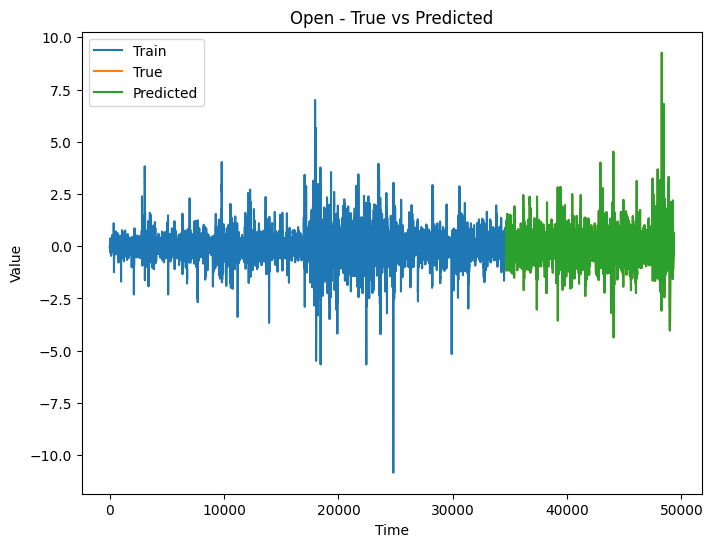

Метрики Open
MSE: 0.005154055584454043
RMSE: 0.07179175150707805
MAE: 0.00354853813099819
SMAPE: 0.069
R2: 0.9911405218653265 



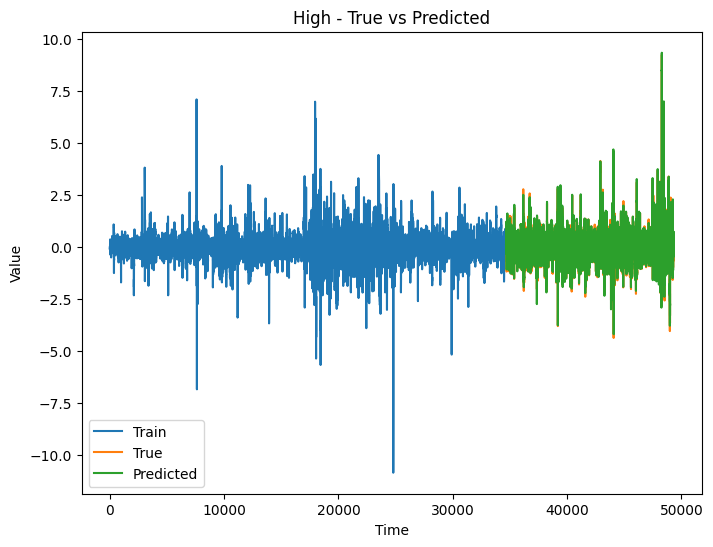

Метрики High
MSE: 0.029445358864235657
RMSE: 0.17159650015147646
MAE: 0.08694544265794833
SMAPE: 0.374
R2: 0.9492444839391931 



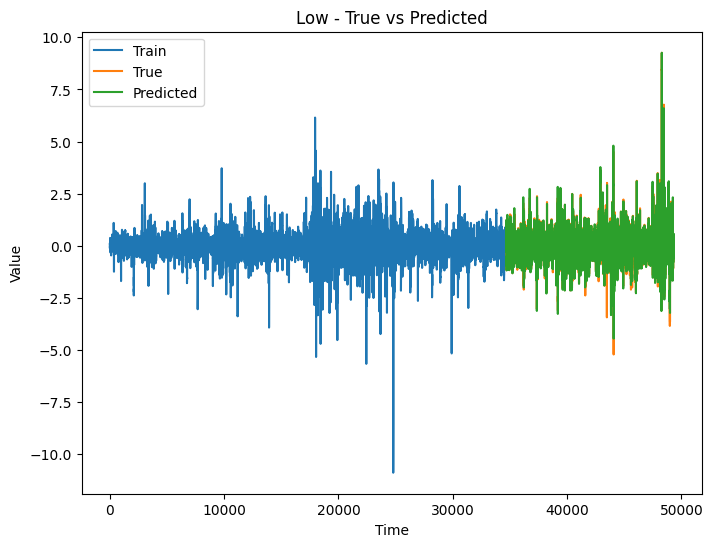

Метрики Low
MSE: 0.02852655087785233
RMSE: 0.16889804876863537
MAE: 0.08469274300249711
SMAPE: 0.37
R2: 0.9509737143867866 



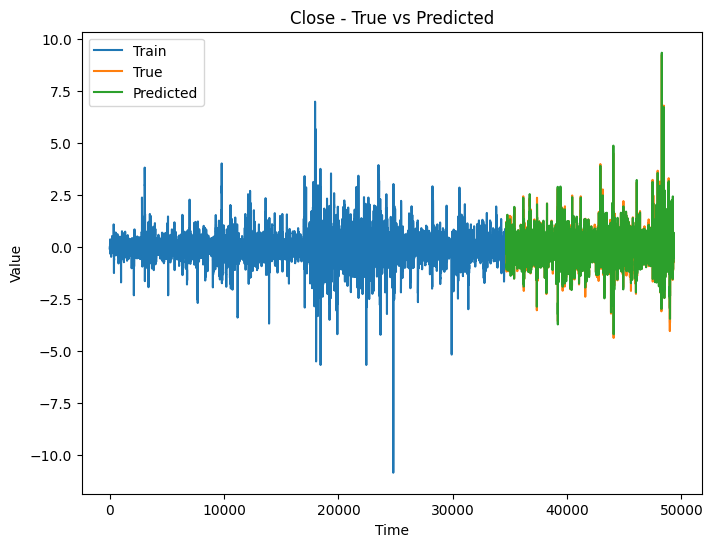

Метрики Close
MSE: 0.05157881029744966
RMSE: 0.22710968781064725
MAE: 0.12166589562769271
SMAPE: 0.464
R2: 0.91148300052944 



In [71]:
plot_and_metrics(data.columns, Y_test, Y_pred, Y_train)

По метрикам:<br>

Адекватное MSE, RMSE, MAE - ниже единицы, что есть хорошо.<br>
SMAPE тоже показывает себя неплохо (чем ниже - тем лучше).<br>
По R2 - >0.9, хорошо, очень близко к единице.<br>



#### Следующая модель - VARMA

In [74]:
X = data
train, test = X[:35000], X[35000:]

In [75]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

Подберём оптимальные параметры для обучения при помощи AutoArima.<br>

In [76]:
from pmdarima import auto_arima

pq = []
for name, column in differenced_series.items():
    print(f'Searching order of p and q for : {name}')
    stepwise_model = auto_arima(data[name],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{name} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Searching order of p and q for : Open
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-20842.501, Time=20.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-20732.285, Time=3.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-20777.581, Time=1.98 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-20780.799, Time=3.76 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-20729.854, Time=1.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-20828.391, Time=4.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-20827.714, Time=4.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-20827.711, Time=3.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-20828.681, Time=2.64 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-20829.550, Time=14.41 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-20837.932, Time=4.50 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 63.236 seconds
optimal order for:Open is: (1, 1, 1) 


Searching order of p and q for : High
Performing st

In [78]:
pq.remove((1, 1, 1)) # Удалим дублирующиеся параметры

In [79]:
pq

[(0, 1, 1), (2, 1, 0), (1, 1, 1)]

Определим функцию для обратного интегрирования

In [80]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

Подберем опытным путём наилучший порядок

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn import metrics

df_results_moni = pd.DataFrame(columns=['p', 'q','RMSE Open','RMSE High','RMSE Low','RMSE Close'])
for i in pq:
    if i[0]== 0 and i[2]==0:
        pass
    else:
        model = VARMAX(train_diff, order=(i[0],i[2])).fit(disp=False)
        result = model.forecast(steps = len(test))
        inv_res = inverse_diff(data, result)
        Opensrmse = np.sqrt(metrics.mean_squared_error(test['Open'], inv_res.Open_1st_inv_diff))
        Highrmse = np.sqrt(metrics.mean_squared_error(test['High'], inv_res.High_1st_inv_diff))
        Lowrmse = np.sqrt(metrics.mean_squared_error(test['Low'], inv_res.Low_1st_inv_diff))
        Closermse = np.sqrt(metrics.mean_squared_error(test['Close'], inv_res.Close_1st_inv_diff))
        new_row = {'p': i[0], 'q': i[2], 'RMSE Open':Opensrmse,'RMSE High':Highrmse,'RMSE Low':Lowrmse,'RMSE Close':Closermse}
        df_results_moni = pd.concat([df_results_moni, pd.DataFrame([new_row])], ignore_index=True)

In [ ]:
df_results_moni.sort_values(by = ['RMSE Open','RMSE High','RMSE Low','RMSE Close'] )

,p,q,RMSE Open,RMSE High,RMSE Low,RMSE Close
2,1,1,45.248900,45.025409,44.052961,45.622976
1,2,0,45.670556,45.687014,45.676008,45.695982
0,0,1,53.057636,61.284548,50.761695,53.687026


Наилучшие p, q - 1,1 

In [83]:
model = VARMAX(train_diff, order=(1,1)).fit(disp=False)
result = model.forecast(steps=len(test))

c:\Users\urban\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\urban\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\urban\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\urban\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. 

Применив обратное интегрирование к результату.

In [88]:
res = inverse_diff(data, result)

In [89]:
res

,Open,High,Low,Close,Open_1st_inv_diff,High_1st_inv_diff,Low_1st_inv_diff,Close_1st_inv_diff
34999,-0.004826,0.085330,-0.098765,-0.007054,221.395174,221.485330,221.301235,221.392946
35000,-0.006441,-0.043464,0.034672,-0.000403,221.388733,221.441866,221.335906,221.392543
35001,0.000369,0.018909,-0.014894,0.002372,221.389102,221.460775,221.321012,221.394914
35002,0.001952,-0.006620,0.007854,0.000606,221.391054,221.454155,221.328866,221.395521
35003,0.000670,0.004420,-0.002079,0.001277,221.391724,221.458575,221.326787,221.396797
...,...,...,...,...,...,...,...,...
49994,0.001029,0.000993,0.000853,0.001084,236.816694,236.345133,234.116353,237.645378
49995,0.001029,0.000993,0.000853,0.001084,236.817723,236.346126,234.117206,237.646462
49996,0.001029,0.000993,0.000853,0.001084,236.818752,236.347119,234.118059,237.647546
49997,0.001029,0.000993,0.000853,0.001084,236.819781,236.348112,234.118912,237.648630


In [101]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

Считаем метрики и отрисовываем предсказания.

In [102]:
def smape_score(actual, predicted) -> float: 
    if not all([isinstance(actual, np.ndarray),  
                isinstance(predicted, np.ndarray)]): 
        actual, predicted = np.array(actual), np.array(predicted) 
  
    return round( 
        np.mean( 
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual)) / 2) 
        ), 3
    ) 

def timeseries_evaluation_metrics_func(y_true, y_pred):
    print(f'MSE: {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE: {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'SMAPE: {smape_score(y_true, y_pred)}')
    print(f'R2: {metrics.r2_score(y_true, y_pred)}',end='\n\n')

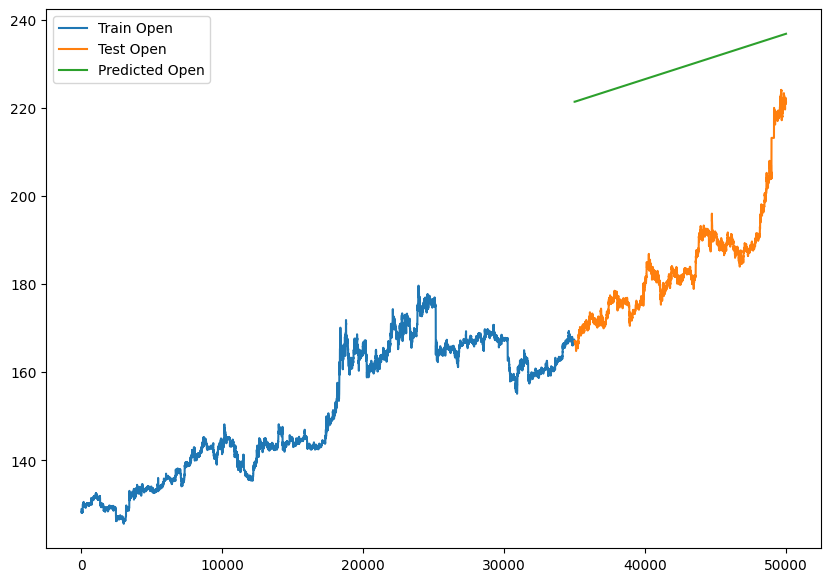

Evaluation metric for Open
MSE: 2047.46291071122
MAE: 44.41128749472302
RMSE: 45.24889955248879
SMAPE: 0.216
R2: -12.52620755104021



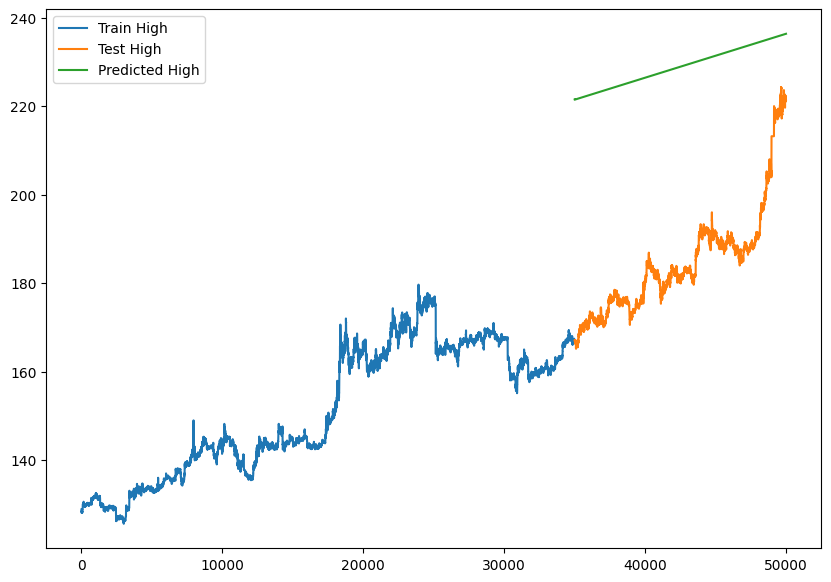

Evaluation metric for High
MSE: 2027.2874484648735
MAE: 44.15827964299652
RMSE: 45.02540892057365
SMAPE: 0.215
R2: -12.36552742707661



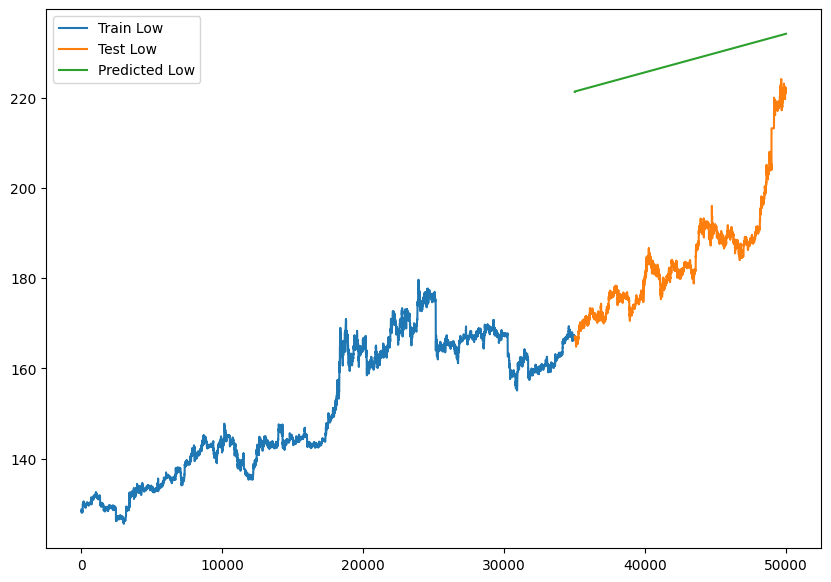

Evaluation metric for Low
MSE: 1940.6634129450683
MAE: 43.076202211106306
RMSE: 44.05296145487915
SMAPE: 0.211
R2: -11.843183126406377



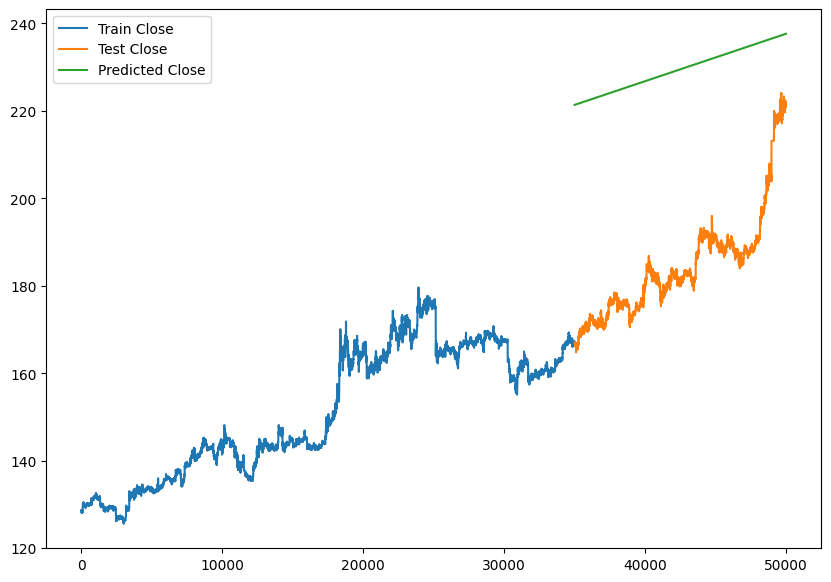

Evaluation metric for Close
MSE: 2081.455916352646
MAE: 44.82502727705674
RMSE: 45.622975750740395
SMAPE: 0.218
R2: -12.747003970749736



In [108]:
for i in ['Open', 'High', 'Low', 'Close' ]:
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot(train[str(i)], label='Train '+str(i))
    plt.plot(range(35000, 50000), test[str(i)], label='Test '+str(i))
    plt.plot(range(35000, 50000), res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()

    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])



Единственная более менее неплохая метрика - MAE (< 50).<br>
Остальные метрики, к сожалению, очень ужасны.<br>

Да и судя по графику предсказания так себе, возможно стоило задать модель с параметрами (339, что-то), но к сожалению, обучение очень долгое.

## Нейросети

#### LSTM

LSTM (Long Short-Term Memory) - это тип рекуррентной нейронной сети (RNN), разработанный для работы с последовательными данными, такими как временные ряды, тексты, аудио и другие последовательные данные.

Основная особенность LSTM заключается в способности учитывать зависимости и долгосрочные зависимости в данных, что часто бывает сложно для обычных RNN. Они обладают способностью запоминать информацию на протяжении длительных временных интервалов и избегать проблемы затухания/взрыва градиентов, которая часто встречается у обычных RNN.

Определим саму модель нейросети.

In [4]:
import torch.nn as nn

class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

Определим функцию разделения датасета

In [15]:
def data_split(ts, param="4", train_percentage=0.7):
    timeseries = ts[ts.columns[int(param)]].values.astype('float32')
    train_size = int(len(timeseries) * train_percentage)
    train, test = timeseries[:train_size], timeseries[train_size:]
    return train, test, timeseries

И создания для подачи на вход LSTM.

In [6]:
import torch

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

Создади функцию для обучения модели и предсказаний.

In [38]:
import torch.optim as optim
import torch.utils.data as torch_data

def train_model(model, X_train, X_test, y_train, y_test, optimizer, loader, loss_l1, n_epochs):
    y_pred_train = None
    y_pred_test = None

    for epoch in range(n_epochs):
        model.train()
        for X_batch, y_batch in loader:
            y_pred = model(X_batch)
            loss = loss_l1(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        model.eval()
        with torch.no_grad():
            y_pred = model(X_train)
            y_pred_train = y_pred
            train_rmse = np.sqrt(loss_l1(y_pred, y_train))
            y_pred = model(X_test)
            y_pred_test = y_pred
            test_rmse = np.sqrt(loss_l1(y_pred, y_test))
            print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
            if (test_rmse < 2.3):
                break

    return y_pred_train, y_pred_test, model

Подготовим данные и запустим на обучение.

В качестве оптимизатора используем Adam с параметрами модели, в качестве функции ошибки будем использовать MSE.

In [39]:
data_LSTM = data.copy()

train, test, total = data_split(data_LSTM)
lookback = 1
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
 
model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = torch_data.DataLoader(torch_data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

EPOCHS = 100

y_pred_train, y_pred_test, model = train_model(model, X_train, X_test, y_train, y_test, optimizer, loader, loss_fn, EPOCHS)

Epoch 0: train RMSE 22.2669, test RMSE 51.4863
Epoch 1: train RMSE 2.2904, test RMSE 18.2254
Epoch 2: train RMSE 0.8440, test RMSE 8.2998
Epoch 3: train RMSE 1.1877, test RMSE 5.1712
Epoch 4: train RMSE 1.0787, test RMSE 3.7063
Epoch 5: train RMSE 0.7942, test RMSE 2.9514
Epoch 6: train RMSE 0.6081, test RMSE 2.4377
Epoch 7: train RMSE 0.8193, test RMSE 2.7628
Epoch 8: train RMSE 0.9635, test RMSE 2.5771
Epoch 9: train RMSE 0.3559, test RMSE 2.7410
Epoch 10: train RMSE 0.3993, test RMSE 2.0920


Считаем метрики и для наглядности построим графики истинных меток и предсказаний.

LSTM metrics: 
SMAPE: 0.005
RMSE: 2.0919714818290744
MAE: 0.9649098
MSE: 4.3763447
R2: 0.9612463485559012


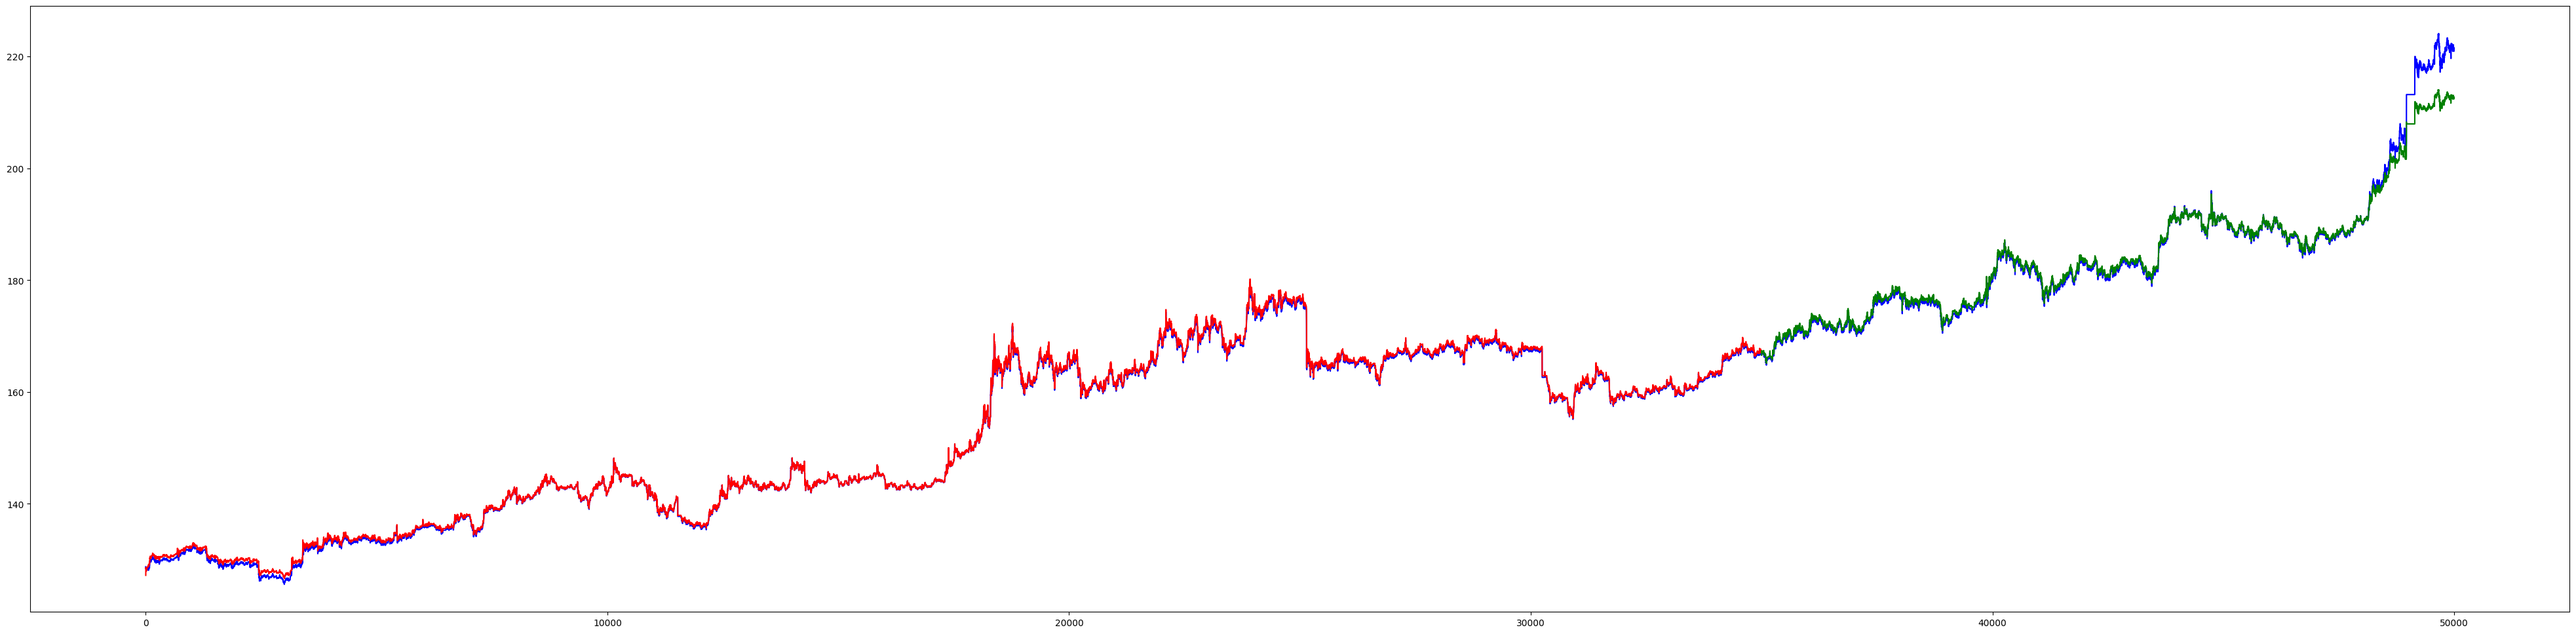

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

def smape_score(actual, predicted) -> float: 
    if not all([isinstance(actual, np.ndarray),  
                isinstance(predicted, np.ndarray)]): 
        actual, predicted = np.array(actual), np.array(predicted) 
  
    return round( 
        np.mean( 
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual)) / 2) 
        ), 3
    ) 

def validate(true, pred):
    true = pd.DataFrame(true.flatten().numpy())[0]
    pred = pd.DataFrame(pred.flatten().numpy())[0]

    print("SMAPE:", smape_score(true, pred))
    print("RMSE:", sqrt(mean_squared_error(true, pred)))
    print("MAE:", mean_absolute_error(true, pred))
    print("MSE:", mean_squared_error(true, pred))
    print("R2:", r2_score(true, pred))

def plot_train_n_pred(X_train, X_test, total, model):
    with torch.no_grad():
        train_plot = np.ones_like(total) * np.nan
        y_pred = model(X_train)
        y_pred = y_pred[:, -1]
        train_size = len(X_train)
        train_plot[lookback:train_size + 1] = model(X_train)[:, -1]
        test_plot = np.ones_like(total) * np.nan
        test_plot[train_size + lookback:len(total) - 1] = model(X_test)[:, -1]

    plt.rcParams["figure.figsize"] = [50, 12]
    plt.plot(total, c='b')
    plt.plot(train_plot, c='r')
    plt.plot(test_plot, c='g')
    plt.show()

def validate_on_auto_measurement(model):
    valid_train, valid_test, valid_total = data_split(data)    
    lookback = 1
    X_train, _ = create_dataset(valid_train, lookback=lookback)
    X_test, y_test = create_dataset(valid_test, lookback=lookback)

    y_pred = model(X_test)
    y_pred_test = y_pred
        
    print("LSTM metrics: ")
    try:
        validate(y_pred_test, y_test)
    except:
        validate(y_pred_test.detach(), y_test.detach())
    plot_train_n_pred(X_train, X_test, valid_total, model)

validate_on_auto_measurement(model)

По метрикам показало себе чуть лучше, чем классические модели.

MAE, MSE, RMSE в целом очень малы (< 5), что является отличным результатом.
SMAPE показал себя наилучшим образом, меньше 1 и даже близко к нулю, что очень приятно.

R2 ~= 0.96, что очень близко к единице, что очевидно является хорошим показателем.

#### CNN-LSTM Hybrid

Модель CNN-LSTM Hybrid (гибридная модель сверточной и рекуррентной нейронных сетей) представляет собой комбинацию сверточной нейронной сети (CNN) и рекуррентной нейронной сети с долгой краткосрочной памятью (LSTM). Эта модель используется для работы с последовательными данными, включая временные ряды.<br>

Идея этой архитектуры заключается в том, чтобы использовать сверточные слои для извлечения пространственных признаков из входных данных временного ряда. Сверточные слои способны выделять различные паттерны и признаки из последовательных данных. После этого результаты сверточных слоев передаются в рекуррентные слои LSTM для обработки последовательности во времени и выявления долгосрочных зависимостей.

Определим саму модель.

In [110]:
class CovidPredictor(nn.Module):
    def __init__(self, n_features, n_hidden, seq_len, n_layers):
        super(CovidPredictor, self).__init__()
        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers
        self.c1 = nn.Conv1d(in_channels=1, out_channels=1, kernel_size = 2, stride = 1)
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=n_hidden,
            num_layers=n_layers
        )
        self.linear = nn.Linear(in_features=n_hidden, out_features=1)
    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.n_layers, self.seq_len-1, self.n_hidden),
            torch.zeros(self.n_layers, self.seq_len-1, self.n_hidden)
        )
    def forward(self, sequences):
        sequences = self.c1(sequences.view(len(sequences), 1, -1))
        lstm_out, self.hidden = self.lstm(
            sequences.view(len(sequences), self.seq_len-1, -1),
            self.hidden
        )
        last_time_step = lstm_out.view(self.seq_len-1, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)
        return y_pred

Определим для модели функцию обучения.

In [111]:
def train_model(model, train_data, train_labels, val_data=None, val_labels=None, num_epochs=100, verbose = 10, patience = 10):
    loss_fn = torch.nn.L1Loss()
    optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
    train_hist = []
    val_hist = []
    for t in range(num_epochs):

        epoch_loss = 0

        for idx, seq in enumerate(train_data): 
            model.reset_hidden_state()
            seq = torch.unsqueeze(seq, 0)
            y_pred = model(seq)
            loss = loss_fn(y_pred[0].float(), train_labels[idx])

            optimiser.zero_grad()
            loss.backward()
            optimiser.step()

            epoch_loss += loss.item()

        train_hist.append(epoch_loss / len(train_data))
        if val_data is not None:
            with torch.no_grad():
                val_loss = 0
                for val_idx, val_seq in enumerate(val_data):
                    model.reset_hidden_state()
                    val_seq = torch.unsqueeze(val_seq, 0)
                    y_val_pred = model(val_seq)
                    val_step_loss = loss_fn(y_val_pred[0].float(), val_labels[val_idx])
                    val_loss += val_step_loss
            
            val_hist.append(val_loss / len(val_data))
            if t % verbose == 0:
                print(f'Epoch {t} train loss: {epoch_loss / len(train_data)} val loss: {val_loss / len(val_data)}')
            if (t % patience == 0) & (t != 0):
                if val_hist[t - patience] < val_hist[t] :
                    print('\n Early Stopping')
                    break
        elif t % verbose == 0:
            print(f'Epoch {t} train loss: {epoch_loss / len(train_data)}')
    return model, train_hist, val_hist

Определим параметры для данной модели, включая функция для разделения датасета и его создания для подачи на вход нейросети.

In [127]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)]
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

def make_Tensor(array):
    return torch.from_numpy(array).float()

In [ ]:
data_LSTM_СNN = data.copy()

X, y = create_sequences(data, seq_length=5)

X_train, y_train = X[:35000], y[:35000]
X_val, y_val = X[35000:40000], y[35000:40000]
X_test, y_test = X[40000:], y[40000:]

MIN = X_train.min()
MAX = X_train.max()

X_train = make_Tensor(X_train)
y_train = make_Tensor(y_train)
X_val = make_Tensor(X_val)
y_val = make_Tensor(y_val)
X_test = make_Tensor(X_test)
y_test = make_Tensor(y_test)

model = CovidPredictor(
    n_features=1,
    n_hidden=4,
    seq_len=5,
    n_layers=1
)
 
EPOCHS = 100

Обучим модель.

In [126]:
model, train_hist, val_hist = train_model(
    model,
    X_train,
    y_train,
    X_test,
    y_test,
    num_epochs=100,
    verbose=10,
    patience=50
)

RuntimeError: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size

Сделаем предсказания для модели на тестовой выборке.

In [ ]:
pred_dataset = X_test

with torch.no_grad():
    preds = []
    for _ in range(len(pred_dataset)):
        model.reset_hidden_state()
        y_test_pred = model(torch.unsqueeze(pred_dataset[_], 0))
        pred = torch.flatten(y_test_pred).item()
        preds.append(pred)

Построим графики сравнения предсказаний и истинных меток, посчитаем метрики.

In [ ]:
plt.plot(np.array(y_test), label = 'True')
plt.plot(np.array(preds), label = 'Pred')
plt.legend()

In [ ]:
### Type code here for metrics

#### DeepAR

DeepAR - это модель для прогнозирования временных рядов, разработанная компанией Amazon и представленная в их сервисе глубокого обучения Amazon Forecast. Эта модель основана на рекуррентной нейронной сети (RNN) и специально предназначена для работы с временными рядами, учитывая их динамику и внутренние зависимости.

Подготовим данные для подачи на вход нейросети.

In [5]:
file_path = 'data/gemini_ETHUSD_2020_1min.csv'
data = pd.read_csv(file_path, index_col=False)
del data['Symbol']
del data['Unix Timestamp']
del data['Volume']

data = data.iloc[::-1].reset_index(drop=True)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index(data['Date'], inplace=True)

data = data[:50000]

In [3]:
data

,Date,Open,High,Low,Close
Date,,,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,128.84,128.84,128.74,128.74
2020-01-01 00:01:00,2020-01-01 00:01:00,128.74,128.74,128.74,128.74
2020-01-01 00:02:00,2020-01-01 00:02:00,128.74,128.74,128.74,128.74
2020-01-01 00:03:00,2020-01-01 00:03:00,128.74,128.74,128.74,128.74
2020-01-01 00:04:00,2020-01-01 00:04:00,128.74,128.74,128.49,128.50
...,...,...,...,...,...
2020-02-07 17:13:00,2020-02-07 17:13:00,221.39,221.40,221.24,221.24
2020-02-07 17:14:00,2020-02-07 17:14:00,221.24,221.26,221.24,221.26
2020-02-07 17:15:00,2020-02-07 17:15:00,221.26,221.48,221.26,221.48


In [48]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

df = {
    "start": data.index[0],
    "target": data['Open'].values, 
    "feat_dynamic_real": [data[col].values for col in data.columns if col != 'Open']
}
train_ds = ListDataset([df], freq='S')
test_size = 5000
train, test = split(train_ds, offset=test_size)

In [49]:
train, test

(TrainingDataset(dataset=[{'start': Period('2020-01-01 00:00:00', 'S'), 'target': array([128.84, 128.74, 128.74, ..., 221.26, 221.48, 221.4 ], dtype=float32), 'feat_dynamic_real': array([[1.5778368e+18, 1.5778368e+18, 1.5778370e+18, ..., 1.5810957e+18,
         1.5810958e+18, 1.5810958e+18],
        [1.2884000e+02, 1.2874001e+02, 1.2874001e+02, ..., 2.2148000e+02,
         2.2148000e+02, 2.2139999e+02],
        [1.2874001e+02, 1.2874001e+02, 1.2874001e+02, ..., 2.2125999e+02,
         2.2139999e+02, 2.2139999e+02],
        [1.2874001e+02, 1.2874001e+02, 1.2874001e+02, ..., 2.2148000e+02,
         2.2139999e+02, 2.2139999e+02]], dtype=float32)}], splitter=OffsetSplitter(offset=5000)),
 TestTemplate(dataset=[{'start': Period('2020-01-01 00:00:00', 'S'), 'target': array([128.84, 128.74, 128.74, ..., 221.26, 221.48, 221.4 ], dtype=float32), 'feat_dynamic_real': array([[1.5778368e+18, 1.5778368e+18, 1.5778370e+18, ..., 1.5810957e+18,
         1.5810958e+18, 1.5810958e+18],
        [1.288400

Создадим и обучим модель.

In [6]:
EPOCHS = 100
model = DeepAREstimator(freq='S', prediction_length=test_size, trainer_kwargs={'max_epochs':EPOCHS})

In [7]:
predictor = model.train(train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\Иван\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | In sizes                                                           | Out sizes     
----------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 25.1 K | [[1, 1], [1, 1], [1, 5181, 7], [1, 5181], [1, 5181], [1, 5000, 7]] | [1, 100, 5000]
----------------------------------------------------------------------------------------------------------------------------
25.1 K    Trainable params
0         Non-trainable params
25.1 K    Total params
0.100     Total estimated model params size (MB)


Epoch 0: |          | 50/? [01:29<00:00,  0.56it/s, v_num=5, train_loss=4.960]

Epoch 0, global step 50: 'train_loss' reached 4.96153 (best 4.96153), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 50/? [01:29<00:00,  0.56it/s, v_num=5, train_loss=3.290]

Epoch 1, global step 100: 'train_loss' reached 3.29321 (best 3.29321), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=1-step=100.ckpt' as top 1


Epoch 2: |          | 50/? [01:29<00:00,  0.56it/s, v_num=5, train_loss=2.860]

Epoch 2, global step 150: 'train_loss' reached 2.86474 (best 2.86474), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=2-step=150.ckpt' as top 1


Epoch 3: |          | 50/? [01:32<00:00,  0.54it/s, v_num=5, train_loss=2.650]

Epoch 3, global step 200: 'train_loss' reached 2.64701 (best 2.64701), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=3-step=200.ckpt' as top 1


Epoch 4: |          | 50/? [01:29<00:00,  0.56it/s, v_num=5, train_loss=2.920]

Epoch 4, global step 250: 'train_loss' was not in top 1


Epoch 5: |          | 50/? [01:29<00:00,  0.56it/s, v_num=5, train_loss=2.790]

Epoch 5, global step 300: 'train_loss' was not in top 1


Epoch 6: |          | 50/? [01:30<00:00,  0.55it/s, v_num=5, train_loss=2.760]

Epoch 6, global step 350: 'train_loss' was not in top 1


Epoch 7: |          | 50/? [01:30<00:00,  0.55it/s, v_num=5, train_loss=2.150]

Epoch 7, global step 400: 'train_loss' reached 2.14685 (best 2.14685), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=7-step=400.ckpt' as top 1


Epoch 8: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=3.350]

Epoch 8, global step 450: 'train_loss' was not in top 1


Epoch 9: |          | 50/? [01:30<00:00,  0.55it/s, v_num=5, train_loss=3.640]

Epoch 9, global step 500: 'train_loss' was not in top 1


Epoch 10: |          | 50/? [01:30<00:00,  0.55it/s, v_num=5, train_loss=2.500]

Epoch 10, global step 550: 'train_loss' was not in top 1


Epoch 11: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=2.780]

Epoch 11, global step 600: 'train_loss' was not in top 1


Epoch 12: |          | 50/? [01:31<00:00,  0.54it/s, v_num=5, train_loss=2.870]

Epoch 12, global step 650: 'train_loss' was not in top 1


Epoch 13: |          | 50/? [01:37<00:00,  0.51it/s, v_num=5, train_loss=2.710]

Epoch 13, global step 700: 'train_loss' was not in top 1


Epoch 14: |          | 50/? [01:36<00:00,  0.52it/s, v_num=5, train_loss=2.670]

Epoch 14, global step 750: 'train_loss' was not in top 1


Epoch 15: |          | 50/? [01:36<00:00,  0.52it/s, v_num=5, train_loss=2.600]

Epoch 15, global step 800: 'train_loss' was not in top 1


Epoch 16: |          | 50/? [01:35<00:00,  0.52it/s, v_num=5, train_loss=2.530]

Epoch 16, global step 850: 'train_loss' was not in top 1


Epoch 17: |          | 50/? [01:35<00:00,  0.52it/s, v_num=5, train_loss=2.510]

Epoch 17, global step 900: 'train_loss' was not in top 1


Epoch 18: |          | 50/? [01:32<00:00,  0.54it/s, v_num=5, train_loss=2.490]

Epoch 18, global step 950: 'train_loss' was not in top 1


Epoch 19: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.940]

Epoch 19, global step 1000: 'train_loss' reached 1.94047 (best 1.94047), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=19-step=1000.ckpt' as top 1


Epoch 20: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.760]

Epoch 20, global step 1050: 'train_loss' reached 1.75874 (best 1.75874), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=20-step=1050.ckpt' as top 1


Epoch 21: |          | 50/? [01:32<00:00,  0.54it/s, v_num=5, train_loss=1.760]

Epoch 21, global step 1100: 'train_loss' was not in top 1


Epoch 22: |          | 50/? [01:30<00:00,  0.55it/s, v_num=5, train_loss=1.730]

Epoch 22, global step 1150: 'train_loss' reached 1.73414 (best 1.73414), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=22-step=1150.ckpt' as top 1


Epoch 23: |          | 50/? [01:32<00:00,  0.54it/s, v_num=5, train_loss=1.740]

Epoch 23, global step 1200: 'train_loss' was not in top 1


Epoch 24: |          | 50/? [01:38<00:00,  0.51it/s, v_num=5, train_loss=1.740]

Epoch 24, global step 1250: 'train_loss' was not in top 1


Epoch 25: |          | 50/? [01:40<00:00,  0.50it/s, v_num=5, train_loss=1.730]

Epoch 25, global step 1300: 'train_loss' reached 1.73222 (best 1.73222), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=25-step=1300.ckpt' as top 1


Epoch 26: |          | 50/? [01:38<00:00,  0.51it/s, v_num=5, train_loss=1.730]

Epoch 26, global step 1350: 'train_loss' reached 1.72620 (best 1.72620), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=26-step=1350.ckpt' as top 1


Epoch 27: |          | 50/? [01:36<00:00,  0.52it/s, v_num=5, train_loss=1.730]

Epoch 27, global step 1400: 'train_loss' was not in top 1


Epoch 28: |          | 50/? [01:34<00:00,  0.53it/s, v_num=5, train_loss=1.720]

Epoch 28, global step 1450: 'train_loss' reached 1.71518 (best 1.71518), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=28-step=1450.ckpt' as top 1


Epoch 29: |          | 50/? [01:34<00:00,  0.53it/s, v_num=5, train_loss=1.730]

Epoch 29, global step 1500: 'train_loss' was not in top 1


Epoch 30: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.720]

Epoch 30, global step 1550: 'train_loss' was not in top 1


Epoch 31: |          | 50/? [01:32<00:00,  0.54it/s, v_num=5, train_loss=1.710]

Epoch 31, global step 1600: 'train_loss' reached 1.71082 (best 1.71082), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=31-step=1600.ckpt' as top 1


Epoch 32: |          | 50/? [01:33<00:00,  0.53it/s, v_num=5, train_loss=1.720]

Epoch 32, global step 1650: 'train_loss' was not in top 1


Epoch 33: |          | 50/? [01:30<00:00,  0.55it/s, v_num=5, train_loss=1.720]

Epoch 33, global step 1700: 'train_loss' was not in top 1


Epoch 34: |          | 50/? [01:33<00:00,  0.53it/s, v_num=5, train_loss=1.700]

Epoch 34, global step 1750: 'train_loss' reached 1.70470 (best 1.70470), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=34-step=1750.ckpt' as top 1


Epoch 35: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.700]

Epoch 35, global step 1800: 'train_loss' reached 1.70217 (best 1.70217), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=35-step=1800.ckpt' as top 1


Epoch 36: |          | 50/? [01:33<00:00,  0.53it/s, v_num=5, train_loss=1.700]

Epoch 36, global step 1850: 'train_loss' reached 1.69973 (best 1.69973), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=36-step=1850.ckpt' as top 1


Epoch 37: |          | 50/? [01:33<00:00,  0.54it/s, v_num=5, train_loss=1.690]

Epoch 37, global step 1900: 'train_loss' reached 1.69206 (best 1.69206), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=37-step=1900.ckpt' as top 1


Epoch 38: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.720]

Epoch 38, global step 1950: 'train_loss' was not in top 1


Epoch 39: |          | 50/? [01:29<00:00,  0.56it/s, v_num=5, train_loss=1.690]

Epoch 39, global step 2000: 'train_loss' reached 1.69005 (best 1.69005), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=39-step=2000.ckpt' as top 1


Epoch 40: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.710]

Epoch 40, global step 2050: 'train_loss' was not in top 1


Epoch 41: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.710]

Epoch 41, global step 2100: 'train_loss' was not in top 1


Epoch 42: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.690]

Epoch 42, global step 2150: 'train_loss' reached 1.68830 (best 1.68830), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=42-step=2150.ckpt' as top 1


Epoch 43: |          | 50/? [01:32<00:00,  0.54it/s, v_num=5, train_loss=1.700]

Epoch 43, global step 2200: 'train_loss' was not in top 1


Epoch 44: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.680]

Epoch 44, global step 2250: 'train_loss' reached 1.68470 (best 1.68470), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=44-step=2250.ckpt' as top 1


Epoch 45: |          | 50/? [01:30<00:00,  0.55it/s, v_num=5, train_loss=1.680]

Epoch 45, global step 2300: 'train_loss' was not in top 1


Epoch 46: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.680]

Epoch 46, global step 2350: 'train_loss' reached 1.67855 (best 1.67855), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=46-step=2350.ckpt' as top 1


Epoch 47: |          | 50/? [01:32<00:00,  0.54it/s, v_num=5, train_loss=1.680]

Epoch 47, global step 2400: 'train_loss' was not in top 1


Epoch 48: |          | 50/? [01:33<00:00,  0.54it/s, v_num=5, train_loss=1.680]

Epoch 48, global step 2450: 'train_loss' reached 1.67696 (best 1.67696), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=48-step=2450.ckpt' as top 1


Epoch 49: |          | 50/? [01:33<00:00,  0.54it/s, v_num=5, train_loss=1.690]

Epoch 49, global step 2500: 'train_loss' was not in top 1


Epoch 50: |          | 50/? [01:32<00:00,  0.54it/s, v_num=5, train_loss=1.680]

Epoch 50, global step 2550: 'train_loss' was not in top 1


Epoch 51: |          | 50/? [01:30<00:00,  0.56it/s, v_num=5, train_loss=1.680]

Epoch 51, global step 2600: 'train_loss' was not in top 1


Epoch 52: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.690]

Epoch 52, global step 2650: 'train_loss' was not in top 1


Epoch 53: |          | 50/? [01:31<00:00,  0.54it/s, v_num=5, train_loss=1.690]

Epoch 53, global step 2700: 'train_loss' was not in top 1


Epoch 54: |          | 50/? [01:32<00:00,  0.54it/s, v_num=5, train_loss=1.670]

Epoch 54, global step 2750: 'train_loss' reached 1.67360 (best 1.67360), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=54-step=2750.ckpt' as top 1


Epoch 55: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.680]

Epoch 55, global step 2800: 'train_loss' was not in top 1


Epoch 56: |          | 50/? [01:31<00:00,  0.54it/s, v_num=5, train_loss=1.680]

Epoch 56, global step 2850: 'train_loss' was not in top 1


Epoch 57: |          | 50/? [01:31<00:00,  0.54it/s, v_num=5, train_loss=1.690]

Epoch 57, global step 2900: 'train_loss' was not in top 1


Epoch 58: |          | 50/? [01:29<00:00,  0.56it/s, v_num=5, train_loss=1.680]

Epoch 58, global step 2950: 'train_loss' was not in top 1


Epoch 59: |          | 50/? [01:30<00:00,  0.55it/s, v_num=5, train_loss=1.670]

Epoch 59, global step 3000: 'train_loss' reached 1.66764 (best 1.66764), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=59-step=3000.ckpt' as top 1


Epoch 60: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.660]

Epoch 60, global step 3050: 'train_loss' reached 1.65842 (best 1.65842), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=60-step=3050.ckpt' as top 1


Epoch 61: |          | 50/? [01:30<00:00,  0.55it/s, v_num=5, train_loss=1.660]

Epoch 61, global step 3100: 'train_loss' was not in top 1


Epoch 62: |          | 50/? [01:30<00:00,  0.55it/s, v_num=5, train_loss=1.630]

Epoch 62, global step 3150: 'train_loss' reached 1.62952 (best 1.62952), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=62-step=3150.ckpt' as top 1


Epoch 63: |          | 50/? [01:34<00:00,  0.53it/s, v_num=5, train_loss=1.630]

Epoch 63, global step 3200: 'train_loss' reached 1.62881 (best 1.62881), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=63-step=3200.ckpt' as top 1


Epoch 64: |          | 50/? [01:29<00:00,  0.56it/s, v_num=5, train_loss=1.630]

Epoch 64, global step 3250: 'train_loss' was not in top 1


Epoch 65: |          | 50/? [01:29<00:00,  0.56it/s, v_num=5, train_loss=1.640]

Epoch 65, global step 3300: 'train_loss' was not in top 1


Epoch 66: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.640]

Epoch 66, global step 3350: 'train_loss' was not in top 1


Epoch 67: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.640]

Epoch 67, global step 3400: 'train_loss' was not in top 1


Epoch 68: |          | 50/? [01:33<00:00,  0.54it/s, v_num=5, train_loss=1.620]

Epoch 68, global step 3450: 'train_loss' reached 1.62342 (best 1.62342), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=68-step=3450.ckpt' as top 1


Epoch 69: |          | 50/? [01:32<00:00,  0.54it/s, v_num=5, train_loss=1.610]

Epoch 69, global step 3500: 'train_loss' reached 1.60599 (best 1.60599), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=69-step=3500.ckpt' as top 1


Epoch 70: |          | 50/? [01:31<00:00,  0.54it/s, v_num=5, train_loss=1.610]

Epoch 70, global step 3550: 'train_loss' was not in top 1


Epoch 71: |          | 50/? [01:37<00:00,  0.51it/s, v_num=5, train_loss=1.640]

Epoch 71, global step 3600: 'train_loss' was not in top 1


Epoch 72: |          | 50/? [01:33<00:00,  0.53it/s, v_num=5, train_loss=1.620]

Epoch 72, global step 3650: 'train_loss' was not in top 1


Epoch 73: |          | 50/? [01:34<00:00,  0.53it/s, v_num=5, train_loss=1.600]

Epoch 73, global step 3700: 'train_loss' reached 1.59911 (best 1.59911), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=73-step=3700.ckpt' as top 1


Epoch 74: |          | 50/? [01:34<00:00,  0.53it/s, v_num=5, train_loss=1.600]

Epoch 74, global step 3750: 'train_loss' was not in top 1


Epoch 75: |          | 50/? [01:30<00:00,  0.55it/s, v_num=5, train_loss=1.610]

Epoch 75, global step 3800: 'train_loss' was not in top 1


Epoch 76: |          | 50/? [01:33<00:00,  0.54it/s, v_num=5, train_loss=1.590]

Epoch 76, global step 3850: 'train_loss' reached 1.58543 (best 1.58543), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=76-step=3850.ckpt' as top 1


Epoch 77: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.610]

Epoch 77, global step 3900: 'train_loss' was not in top 1


Epoch 78: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.580]

Epoch 78, global step 3950: 'train_loss' reached 1.57913 (best 1.57913), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=78-step=3950.ckpt' as top 1


Epoch 79: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.590]

Epoch 79, global step 4000: 'train_loss' was not in top 1


Epoch 80: |          | 50/? [01:30<00:00,  0.55it/s, v_num=5, train_loss=1.590]

Epoch 80, global step 4050: 'train_loss' was not in top 1


Epoch 81: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.590]

Epoch 81, global step 4100: 'train_loss' was not in top 1


Epoch 82: |          | 50/? [01:30<00:00,  0.56it/s, v_num=5, train_loss=1.590]

Epoch 82, global step 4150: 'train_loss' was not in top 1


Epoch 83: |          | 50/? [01:30<00:00,  0.55it/s, v_num=5, train_loss=1.590]

Epoch 83, global step 4200: 'train_loss' was not in top 1


Epoch 84: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.590]

Epoch 84, global step 4250: 'train_loss' was not in top 1


Epoch 85: |          | 50/? [01:31<00:00,  0.54it/s, v_num=5, train_loss=1.610]

Epoch 85, global step 4300: 'train_loss' was not in top 1


Epoch 86: |          | 50/? [01:30<00:00,  0.56it/s, v_num=5, train_loss=1.600]

Epoch 86, global step 4350: 'train_loss' was not in top 1


Epoch 87: |          | 50/? [01:30<00:00,  0.55it/s, v_num=5, train_loss=1.570]

Epoch 87, global step 4400: 'train_loss' reached 1.57084 (best 1.57084), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=87-step=4400.ckpt' as top 1


Epoch 88: |          | 50/? [01:29<00:00,  0.56it/s, v_num=5, train_loss=1.590]

Epoch 88, global step 4450: 'train_loss' was not in top 1


Epoch 89: |          | 50/? [01:30<00:00,  0.55it/s, v_num=5, train_loss=1.590]

Epoch 89, global step 4500: 'train_loss' was not in top 1


Epoch 90: |          | 50/? [01:29<00:00,  0.56it/s, v_num=5, train_loss=1.590]

Epoch 90, global step 4550: 'train_loss' was not in top 1


Epoch 91: |          | 50/? [01:32<00:00,  0.54it/s, v_num=5, train_loss=1.600]

Epoch 91, global step 4600: 'train_loss' was not in top 1


Epoch 92: |          | 50/? [01:31<00:00,  0.54it/s, v_num=5, train_loss=1.590]

Epoch 92, global step 4650: 'train_loss' was not in top 1


Epoch 93: |          | 50/? [01:32<00:00,  0.54it/s, v_num=5, train_loss=1.530]

Epoch 93, global step 4700: 'train_loss' reached 1.53211 (best 1.53211), saving model to 'c:\\Users\\Иван\\Desktop\\timeseries_hw\\timeseries_homeworks\\final_project\\lightning_logs\\version_5\\checkpoints\\epoch=93-step=4700.ckpt' as top 1


Epoch 94: |          | 50/? [01:34<00:00,  0.53it/s, v_num=5, train_loss=1.550]

Epoch 94, global step 4750: 'train_loss' was not in top 1


Epoch 95: |          | 50/? [01:33<00:00,  0.53it/s, v_num=5, train_loss=1.570]

Epoch 95, global step 4800: 'train_loss' was not in top 1


Epoch 96: |          | 50/? [01:32<00:00,  0.54it/s, v_num=5, train_loss=1.550]

Epoch 96, global step 4850: 'train_loss' was not in top 1


Epoch 97: |          | 50/? [01:30<00:00,  0.56it/s, v_num=5, train_loss=1.560]

Epoch 97, global step 4900: 'train_loss' was not in top 1


Epoch 98: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.580]

Epoch 98, global step 4950: 'train_loss' was not in top 1


Epoch 99: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.580]

Epoch 99, global step 5000: 'train_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: |          | 50/? [01:31<00:00,  0.55it/s, v_num=5, train_loss=1.580]


Сделаем предсказания.

In [50]:
test = test.generate_instances(prediction_length = test_size, windows=1)
forecast = list(predictor.predict(test.input))

Посчитаем метрики.

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

def smape_score(actual, predicted) -> float: 
    if not all([isinstance(actual, np.ndarray),  
                isinstance(predicted, np.ndarray)]): 
        actual, predicted = np.array(actual), np.array(predicted) 
  
    return round( 
        np.mean( 
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual)) / 2) 
        ), 3
    ) 

print("RMSE:", np.sqrt(mean_squared_error(data['Open'][len(data['Open']) - len(forecast[0].samples[0]):len(data['Open'])], forecast[0].samples[0])))
print("SMAPE:", smape_score(data['Open'][len(data['Open']) - len(forecast[0].samples[0]):len(data['Open'])], forecast[0].samples[0]))
print("MAE:", mean_absolute_error(data['Open'][len(data['Open']) - len(forecast[0].samples[0]):len(data['Open'])], forecast[0].samples[0]))
print("R2: ", r2_score(data['Open'][len(data['Open']) - len(forecast[0].samples[0]):len(data['Open'])], forecast[0].samples[0]))

RMSE: 48.32018793584393
SMAPE: 0.27
MAE: 47.02255229797363
R2:  -14.700951370842064


#### TCN

TCN (Temporal Convolutional Network) - это тип нейронной сети, предназначенный для работы с последовательными данных, такими как временные ряды. Эта архитектура основана на использовании сверточных слоев для извлечения признаков из последовательных данных.

Подготовим данные.

In [19]:
df_tcn = pd.DataFrame(data['Date'])
df_tcn['Open'] = data['Open']
df_tcn.set_index('Date', inplace=True)

lookback_window = 20

df_tcn = df_tcn.values

x, y = [], []
for i in range(lookback_window, len(df_tcn)):
    x.append(df_tcn[i - lookback_window:i])
    y.append(df_tcn[i])
x = np.array(x)
y = np.array(y)

Делим данные на обучающую и тестовые выборки

In [20]:
x_train = x[0:35000]
y_train = y[0:35000]
x_test = x[35000:]
y_test = y[35000:]

Определим модель и обучим её.

In [21]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tcn import TCN


i = Input(shape=(lookback_window, 1))
m = TCN()(i)
m = Dense(1, activation='linear')(m)

model = Model(inputs=[i], outputs=[m])
model.summary()
model.compile('adam', 'mae')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 tcn_1 (TCN)                 (None, 64)                136256    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 136321 (532.50 KB)
Trainable params: 136321 (532.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(x_train, y_train, epochs=150, verbose=0)

Делаем предикты

In [23]:
y_pred = model.predict(x_test)

469/469 [==============================] - 2s 5ms/step


Отрисуем предсказания с истинными метками, покажем на графике и посчитаем метрики.

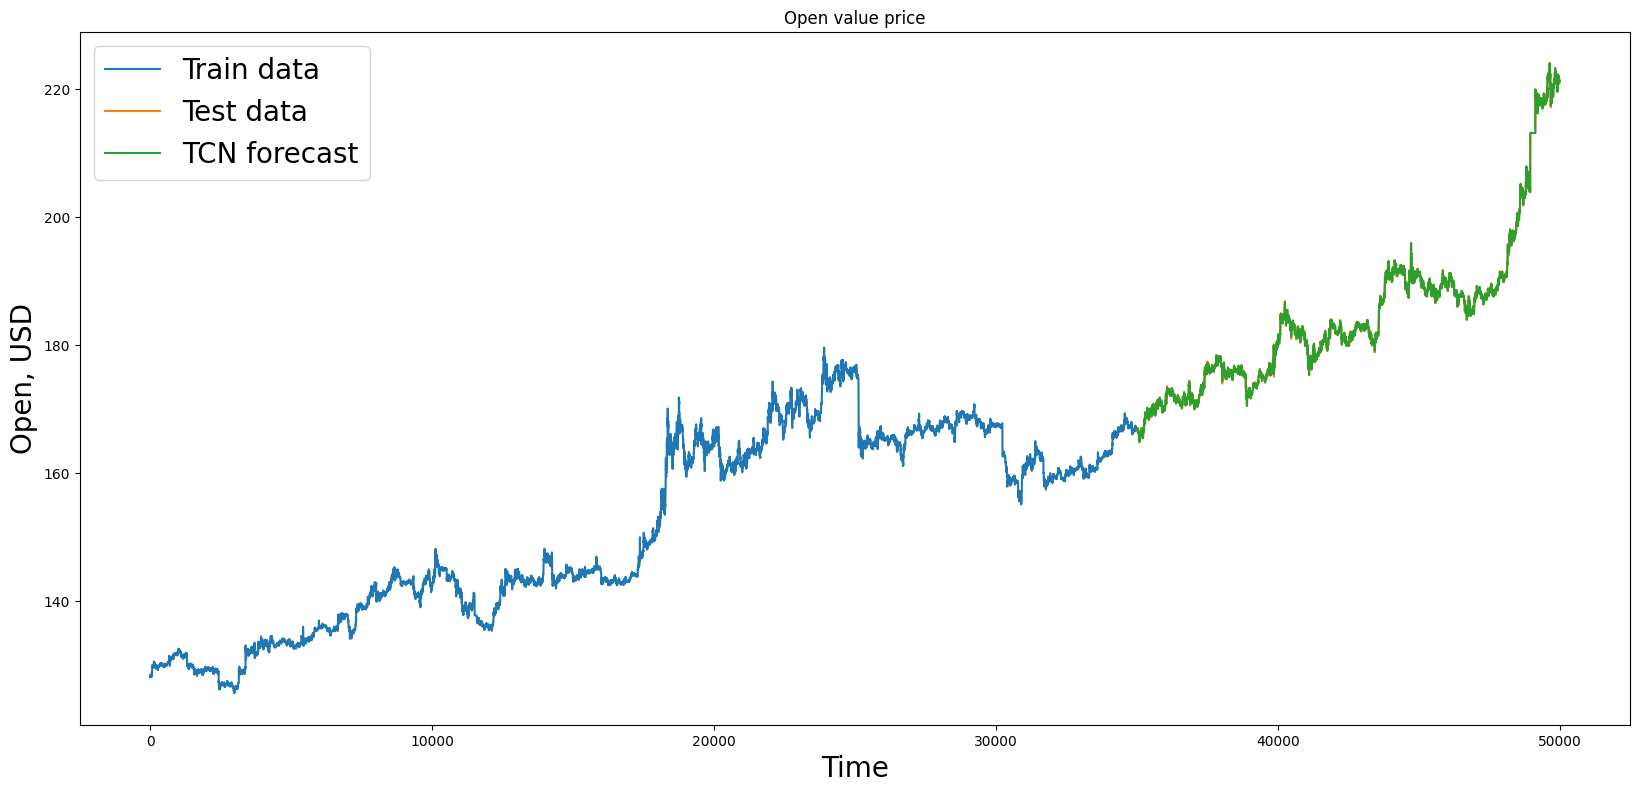

TCN Metrics:
RMSE: 0.2197271603916684
MSE: 0.04828002501378597
SMAPE: 0.001
MAE: 0.10447228494600881
R^2: 0.9996805927624652


In [25]:
fig = plt.figure(figsize=(20, 9))
dur = len(y_pred)
size = int(len(x_train))

plt.plot([i for i in range(0, size)], y_train, label='Train data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], y_test, label='Test data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], y_pred, label='TCN forecast')
plt.legend(fontsize="20")
plt.title('Open value price')
plt.ylabel('Open, USD', fontsize="20")
plt.xlabel('Time', fontsize="20")
plt.show()

def smape_score(actual, predicted) -> float: 
    if not all([isinstance(actual, np.ndarray),  
                isinstance(predicted, np.ndarray)]): 
        actual, predicted = np.array(actual), np.array(predicted) 
  
    return round( 
        np.mean( 
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual)) / 2) 
        ), 3
    ) 

print("TCN Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MSE:", mean_squared_error(y_test, y_pred))
print("SMAPE:", smape_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

RMSE, MSE, MAE < 1 - отличный результат.<br>
SMAPE ниже единицы и опять очень близок к нулю, что очень хорошо.<br>
R2 ~= 0.99, чуть чуть не хватило до 1, почти отличный результат.<br>

## Итог

Среди классических моделей лучше себя показала VAR. Она очень быстро подбирала нужны параметры для обучения и очень быстро обучалась, к тому же прогнозы были качественны, как в итоге и сама модель.<br>

Если выделять среди нейронок, то выбор складывается больше в пользу TCN за счёт простоты настройки и обучения модели. LSTM также хороша тем, что не требует особо препроцессинга для себя, чтобы показать высокое качество.<br>

Ну и в итоге: нейросеть показала себя лучше классических алгоритмов, за счёт того, что в них не нужно особым образом подготавливать данные, дифференцировать ряды, чтобы сделать их стационарными, поскольку и без этого они выдают отличное качество и при этом предсказанные данные не искажаются (так как никакого дифференцирования для них нету).